In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import rankdata
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind

sns.set(style="whitegrid")

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
#secondly will be working on metabolics dataset

#Step 1: Loading the data provided
input_path = "/content/drive/MyDrive/Dataset 2.csv"

input_data = pd.read_csv(input_path)

In [ ]:
len(input_data)

5206

In [ ]:
input_data.head(5)

Sample        S1        S2        S3        S4        S5  \
0  Compound Annotation  1.000000  1.000000  1.000000  1.000000  1.000000   
1         Compound 468  7.475505  7.329756  6.811946  7.385248  7.626119   
2        Compound 3382  6.989769  7.080236  6.889824  6.213607  6.722271   
3        Compound 4793  6.819188  6.868873  6.843599  6.922629  6.833867   
4        Compound 2186  6.858738  6.787733  6.856540  6.970408  6.947345   

         S6        S7        S8        S9  ...       S19       S20       S21  \
0  1.000000  1.000000  1.000000  2.000000  ...  2.000000  2.000000  2.000000   
1  7.590575  7.403692  7.287125  7.355329  ...  7.507965  7.435537  7.330367   
2  7.013836  7.060645  6.783460  7.001999  ...  7.101507  6.887513  6.854224   
3  6.737740  6.826248  6.793886  6.845979  ...  6.743371  6.835760  6.805242   
4  6.949742  7.394426  6.916902  6.692923  ...  6.995888  6.905149  6.875869   

        S22       S23       S24       S25       S26       S27       S28  
0  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000  
1  7.367307  7.418969  7.351389  7.670616  7.412378  7.425305  7.367272  
2  7.062717  6.753966  6.863752  6.722227  6.822723  6.745978  6.775755  
3  6.758864  6.780618  6.735840  6.859521  6.907125  6.843397  6.905871  
4  6.914752  6.960787  6.756019  6.932341  6.792646  6.878472  6.970429  

[5 rows x 29 columns]

In [ ]:
orignal_data = input_data
input_data = input_data.drop(0,axis = 0)
input_data

Sample        S1        S2        S3        S4        S5  \
1      Compound 468  7.475505  7.329756  6.811946  7.385248  7.626119   
2     Compound 3382  6.989769  7.080236  6.889824  6.213607  6.722271   
3     Compound 4793  6.819188  6.868873  6.843599  6.922629  6.833867   
4     Compound 2186  6.858738  6.787733  6.856540  6.970408  6.947345   
5     Compound 4227  7.067272  6.971488  6.868666  6.578207  6.821829   
...             ...       ...       ...       ...       ...       ...   
5201  Compound 5919  6.245255  6.194300  6.165928  6.390953  6.402920   
5202  Compound 5930  6.265979  6.269323  6.296698  6.347539  6.403661   
5203  Compound 5964  6.242246  6.124306  6.177051  6.082200  6.317291   
5204  Compound 5978  6.157839  6.032436  6.130037  6.045991  6.050399   
5205  Compound 5980  5.683136  5.884875  5.765027  5.616814  5.886334   

            S6        S7        S8        S9  ...       S19       S20  \
1     7.590575  7.403692  7.287125  7.355329  ...  7.507965  7.435537   
2     7.013836  7.060645  6.783460  7.001999  ...  7.101507  6.887513   
3     6.737740  6.826248  6.793886  6.845979  ...  6.743371  6.835760   
4     6.949742  7.394426  6.916902  6.692923  ...  6.995888  6.905149   
5     6.922966  7.076807  6.719544  7.012509  ...  6.852931  6.973170   
...        ...       ...       ...       ...  ...       ...       ...   
5201  6.258669  6.262649  6.370278  6.256610  ...  6.269349  6.284218   
5202  6.362765  6.222485  6.277444  6.303384  ...  6.320016  6.411511   
5203  6.257584  6.223415  6.282368  6.305714  ...  6.201274  6.219690   
5204  6.133175  6.040674  6.042695  6.117320  ...  6.161811  6.124916   
5205  5.653571  5.901391  5.905859  5.715543  ...  5.938979  5.725710   

           S21       S22       S23       S24       S25       S26       S27  \
1     7.330367  7.367307  7.418969  7.351389  7.670616  7.412378  7.425305   
2     6.854224  7.062717  6.753966  6.863752  6.722227  6.822723  6.745978   
3     6.805242  6.758864  6.780618  6.735840  6.859521  6.907125  6.843397   
4     6.875869  6.914752  6.960787  6.756019  6.932341  6.792646  6.878472   
5     6.956334  6.918005  6.927555  7.117887  6.980225  6.942907  7.038279   
...        ...       ...       ...       ...       ...       ...       ...   
5201  6.166841  6.263467  6.387067  6.334254  6.145515  6.364408  6.246458   
5202  6.379362  6.353872  6.367754  6.400277  6.367340  6.348874  6.343532   
5203  6.144898  6.269480  6.191840  6.193191  6.295073  6.268855  6.180628   
5204  6.129828  6.095715  6.096871  6.076834  6.058739  6.199614  5.997863   
5205  5.471979  5.811799  5.761502  5.704077  5.918673  5.755731  5.892346   

           S28  
1     7.367272  
2     6.775755  
3     6.905871  
4     6.970429  
5     6.960410  
...        ...  
5201  6.258794  
5202  6.375171  
5203  6.218116  
5204  5.999938  
5205  5.779499  

[5205 rows x 29 columns]

In [ ]:
#so null values present is about 0
input_data.isna().sum().sum()

0

In [ ]:
#samplewise statistics for gene expression
input_data.iloc[:, 1:].describe()

S1           S2           S3           S4           S5  \
count  5205.000000  5205.000000  5205.000000  5205.000000  5205.000000   
mean      7.088989     7.092271     7.078525     7.075488     7.075191   
std       0.578480     0.568823     0.584924     0.587508     0.572077   
min       5.530975     5.667683     5.443891     5.510296     5.533868   
25%       6.758468     6.761539     6.755805     6.755341     6.759622   
50%       6.991434     6.991715     6.989708     6.990831     6.976311   
75%       7.371389     7.365837     7.357220     7.352454     7.347822   
max      10.313452    10.517358    10.175624    10.251454    10.252820   

                S6           S7           S8           S9          S10  ...  \
count  5205.000000  5205.000000  5205.000000  5205.000000  5205.000000  ...   
mean      7.087294     7.089151     7.084638     7.077268     7.090120  ...   
std       0.584182     0.578371     0.570221     0.569626     0.575367  ...   
min       5.543956     5.565442     5.632375     5.595055     5.606844  ...   
25%       6.764535     6.762915     6.758435     6.758332     6.758608  ...   
50%       6.991497     6.990294     6.985199     6.988040     6.991822  ...   
75%       7.370661     7.370892     7.363706     7.349550     7.365358  ...   
max      10.341428    10.081599    10.442653    10.342311    10.305869  ...   

               S19          S20          S21          S22          S23  \
count  5205.000000  5205.000000  5205.000000  5205.000000  5205.000000   
mean      7.080864     7.067163     7.075454     7.088710     7.059228   
std       0.555123     0.566367     0.597044     0.583146     0.562322   
min       5.673660     5.514384     5.400301     5.573647     5.515034   
25%       6.752571     6.752777     6.752158     6.759918     6.755757   
50%       6.980287     6.975863     6.986959     6.991685     6.970714   
75%       7.353290     7.349423     7.360592     7.372487     7.315471   
max      10.420173    10.574945    10.312091    10.035146    10.478896   

               S24          S25          S26          S27          S28  
count  5205.000000  5205.000000  5205.000000  5205.000000  5205.000000  
mean      7.069885     7.075978     7.078043     7.067329     7.072145  
std       0.587103     0.555261     0.557836     0.552304     0.566090  
min       5.253933     5.640595     5.612401     5.608310     5.577736  
25%       6.756050     6.762455     6.757105     6.755924     6.754552  
50%       6.980791     6.979874     6.981884     6.979500     6.979923  
75%       7.344013     7.334904     7.339500     7.333296     7.360231  
max      10.243467    10.366128    10.345576    10.522268    10.090550  

[8 rows x 28 columns]

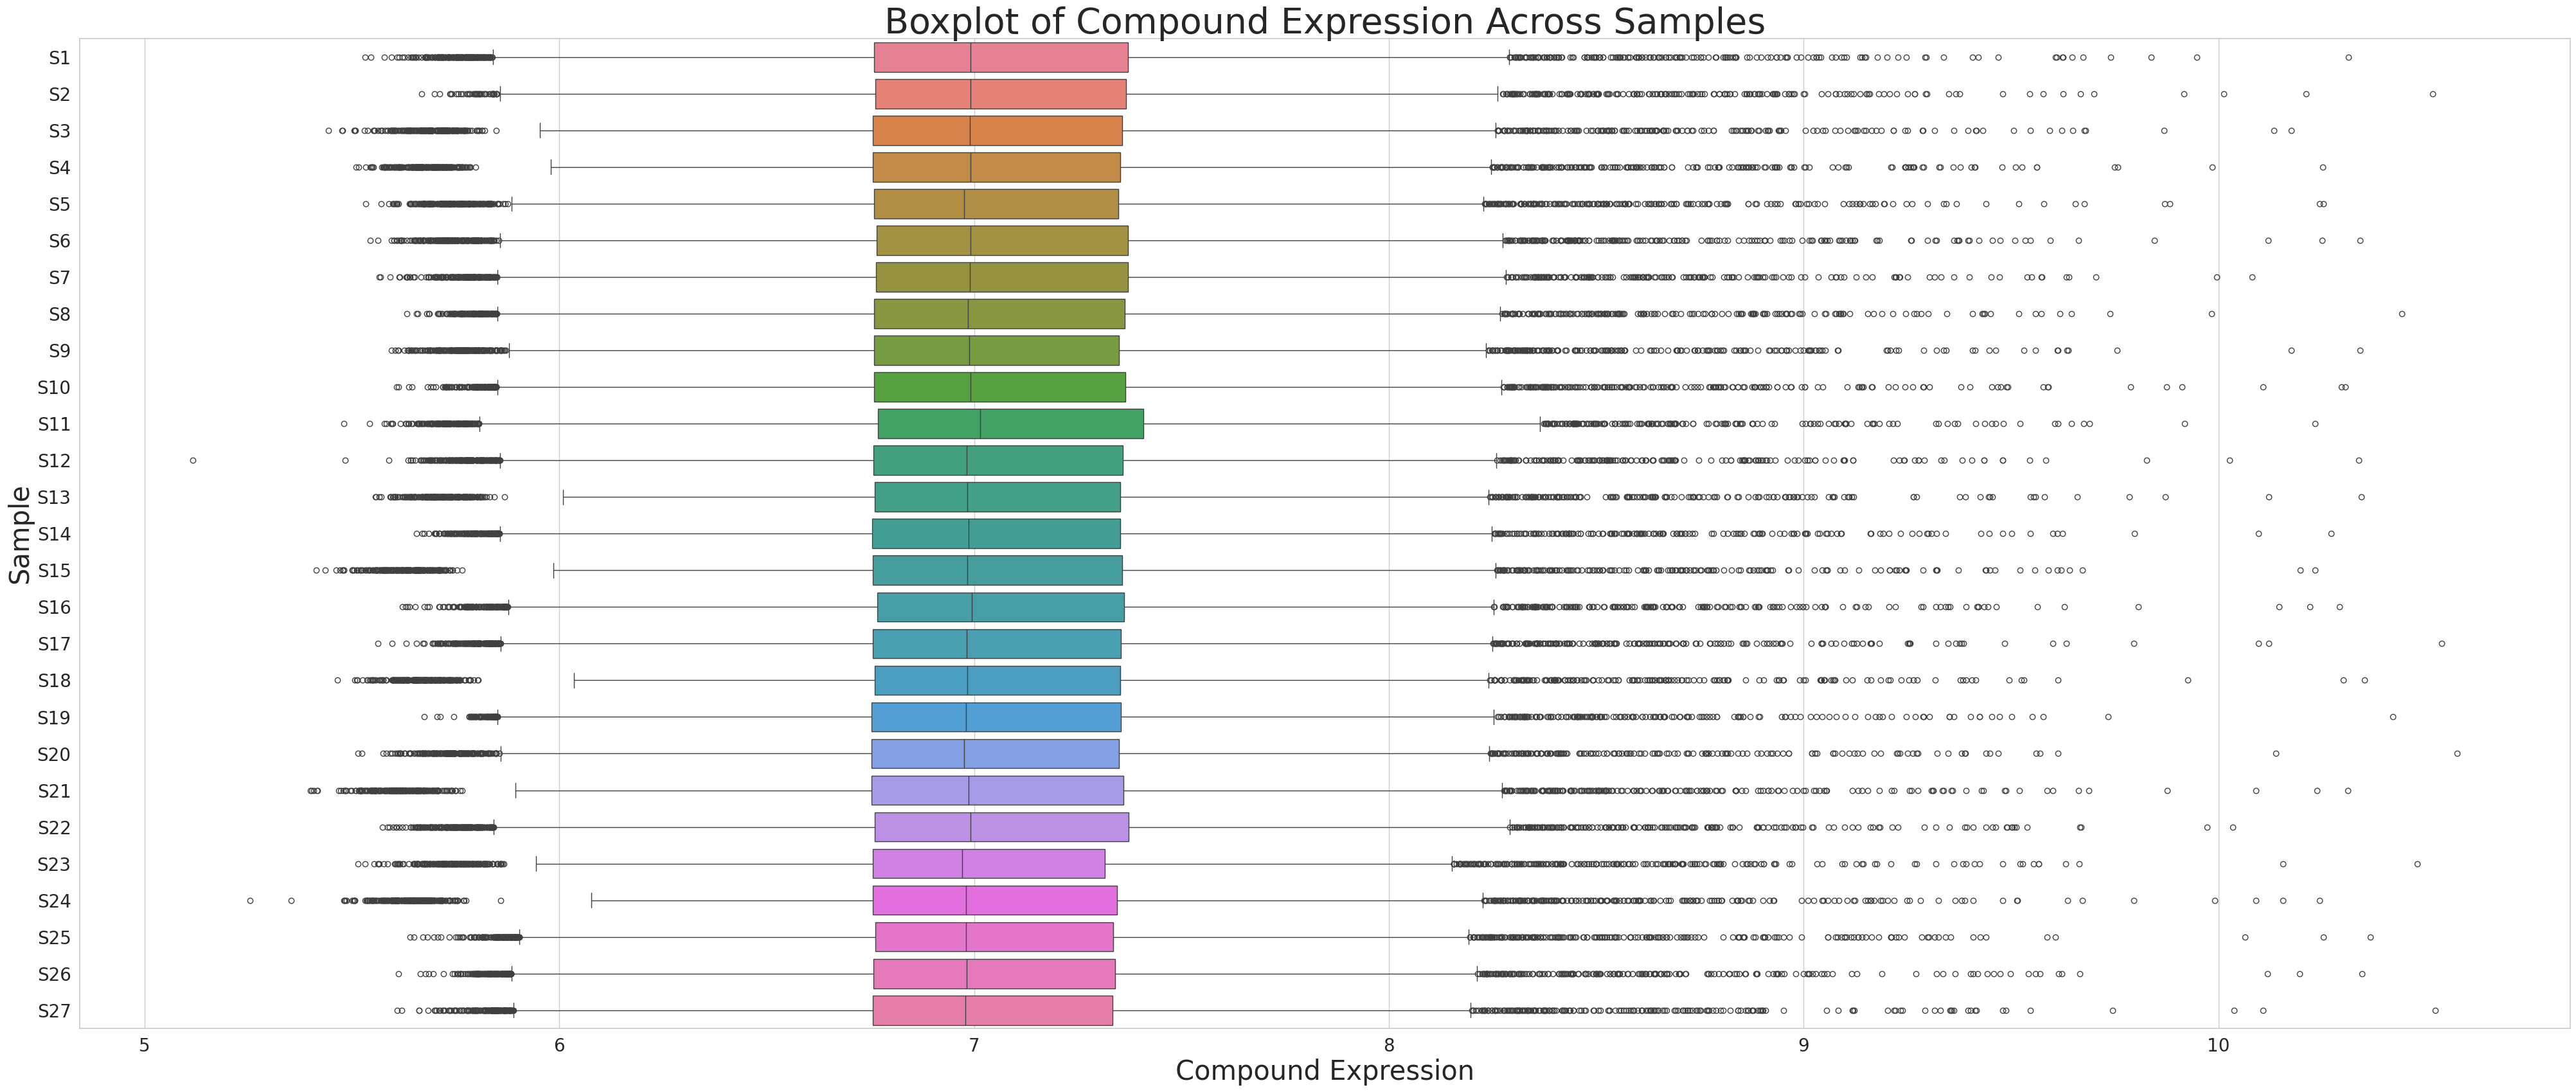

In [ ]:
#samplewise boxplot of compound expression for first 80 samples
plt.figure(figsize=(50, 20))
sns.boxplot(data=input_data.iloc[:, 1:28], orient='h')  # 'h' for horizontal orientation
plt.title('Boxplot of Compound Expression Across Samples',fontsize = 40)
plt.xlabel('Compound Expression', fontsize = 30)
plt.ylabel('Sample',fontsize = 30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

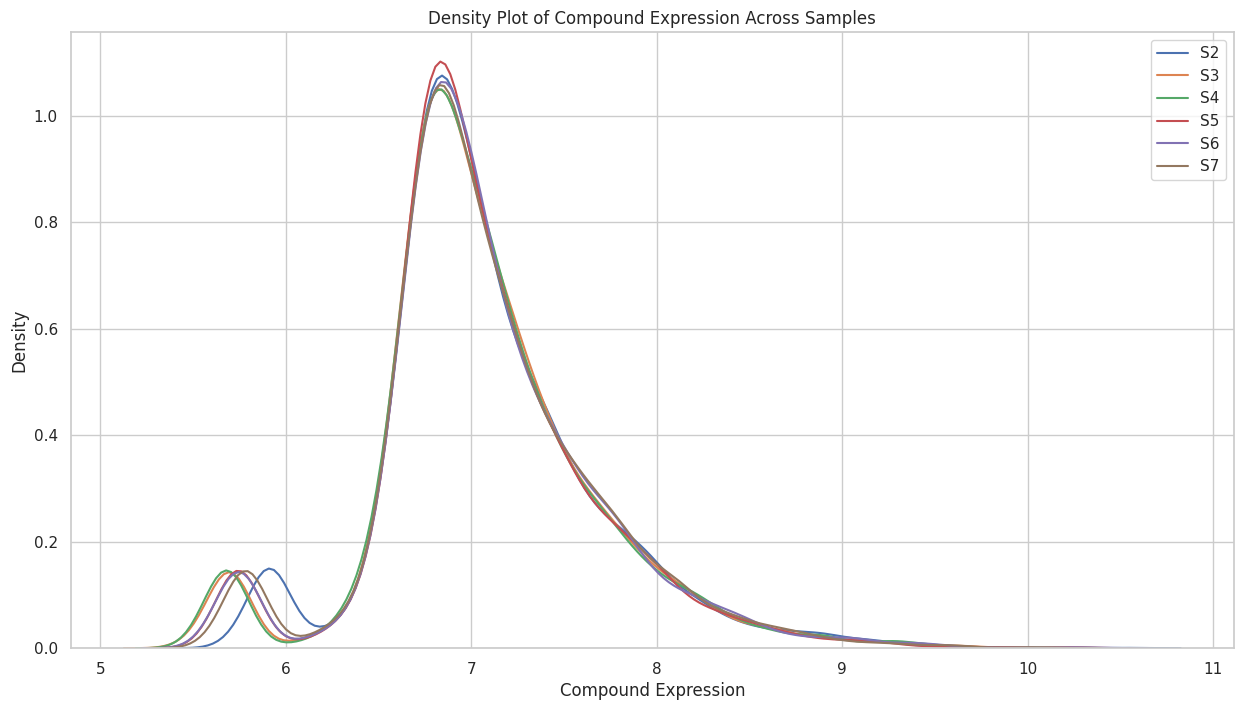

In [ ]:
# Creation of a density plot for each sample
plt.figure(figsize=(15, 8))

# Loopping through each sample and plot the density
for sample_id in input_data.columns[2:8]:
    sns.kdeplot(input_data[sample_id], label=sample_id)

# Setting plot labels and title
plt.title('Density Plot of Compound Expression Across Samples')
plt.xlabel('Compound Expression')
plt.ylabel('Density')
plt.legend()

plt.show()

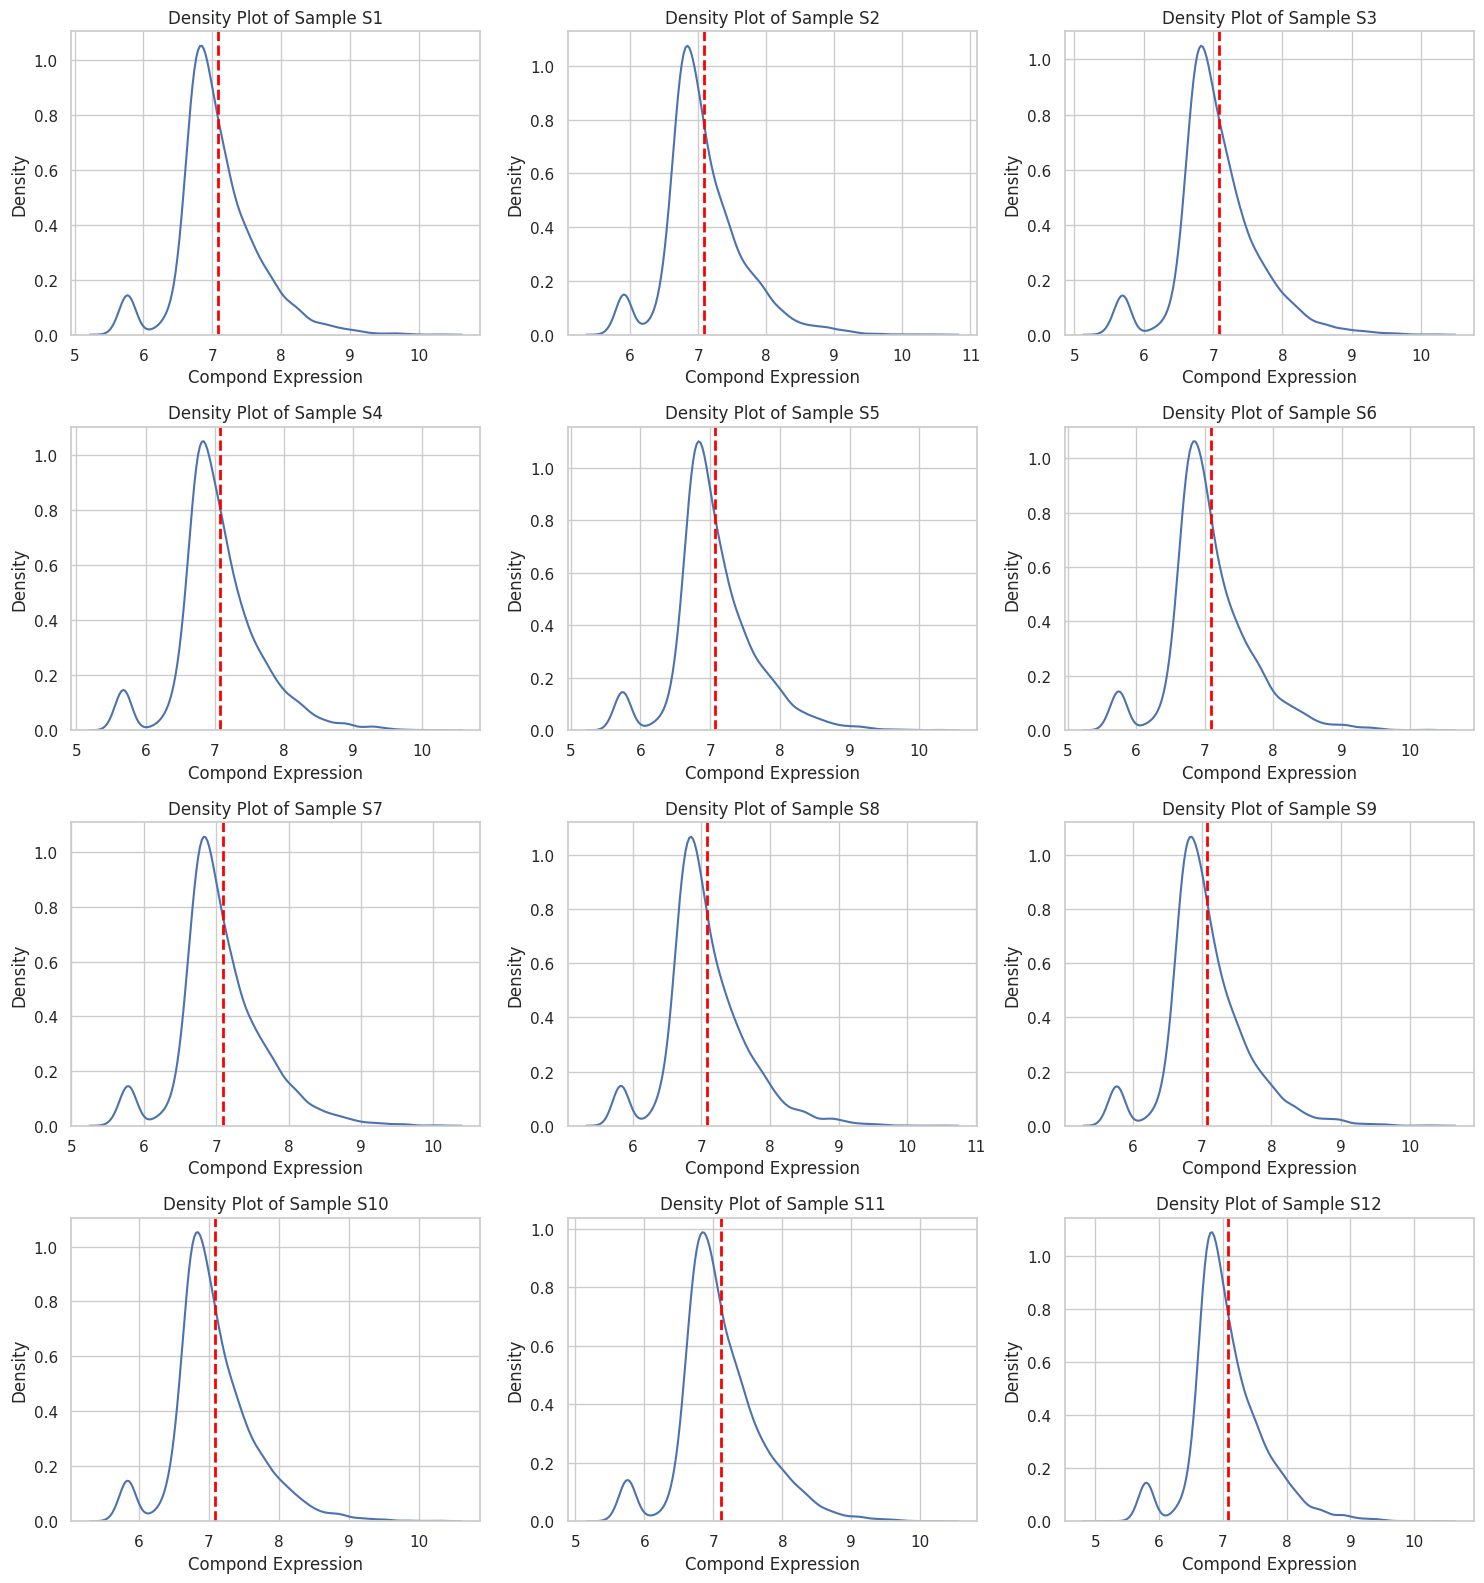

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_density_for_samples(sample_ids, data):
    # Calculating the number of rows and columns for subplots
    num_samples = len(sample_ids)
    num_cols = 3
    num_rows = -(-num_samples // num_cols)

    # Creation of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

    # Flattening the 2D array of subplots to simplify indexing
    axes = axes.flatten()

    # Looping through each sample and plot the density
    for i, sample_id in enumerate(sample_ids):
        ax = axes[i]
        sns.kdeplot(data[sample_id], ax=ax)
        ax.axvline(data[sample_id].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
        ax.set_title(f'Density Plot of Sample {sample_id}')
        ax.set_xlabel('Compond Expression')
        ax.set_ylabel('Density')

    # Adjusting layout for better spacing
    plt.tight_layout()
    plt.show()


sample_ids_to_plot = input_data.columns[1:13]
plot_density_for_samples(sample_ids_to_plot, input_data)

In [ ]:
import pandas as pd

def skewness_kurtosis_summary(sample_ids, data, skewness_threshold=0.5):
    summary_data = {'Sample ID': [], 'Skewness': [], 'Kurtosis': [], 'Skewness Category': []}

    for sample_id in sample_ids:
        expression_data = data[sample_id]
        skewness = expression_data.skew()
        kurtosis = expression_data.kurtosis()

        skewness_category = 'Normal' if abs(skewness) <= skewness_threshold else \
                            'Negatively Skewed' if skewness < 0 else 'Positively Skewed'

        summary_data['Sample ID'].append(sample_id)
        summary_data['Skewness'].append(skewness)
        summary_data['Kurtosis'].append(kurtosis)
        summary_data['Skewness Category'].append(skewness_category)

    summary_df = pd.DataFrame(summary_data)
    return summary_df


sample_ids_to_analyze = input_data.columns[2:]  # Replace with your desired sample IDs
skewness_kurtosis_df = pd.DataFrame(skewness_kurtosis_summary(sample_ids_to_analyze, input_data))

print(skewness_kurtosis_df.drop(columns = ['Skewness Category']))

   Sample ID  Skewness  Kurtosis
0         S2  0.859602  2.243946
1         S3  0.544483  2.181827
2         S4  0.550030  2.158005
3         S5  0.600040  2.179105
4         S6  0.650659  2.254984
5         S7  0.618472  1.866913
6         S8  0.726133  2.136310
7         S9  0.652070  2.262643
8        S10  0.757457  2.208815
9        S11  0.547949  1.662891
10       S12  0.638739  2.087920
11       S13  0.557497  2.328973
12       S14  0.688333  2.148820
13       S15  0.454562  2.264036
14       S16  0.741464  2.160730
15       S17  0.697252  2.165400
16       S18  0.475085  2.206342
17       S19  0.744007  1.957014
18       S20  0.575197  2.197297
19       S21  0.477120  2.286181
20       S22  0.605473  1.905126
21       S23  0.613145  2.399717
22       S24  0.484706  2.322496
23       S25  0.801807  2.310105
24       S26  0.797164  2.341113
25       S27  0.757039  2.390352
26       S28  0.544860  1.895259


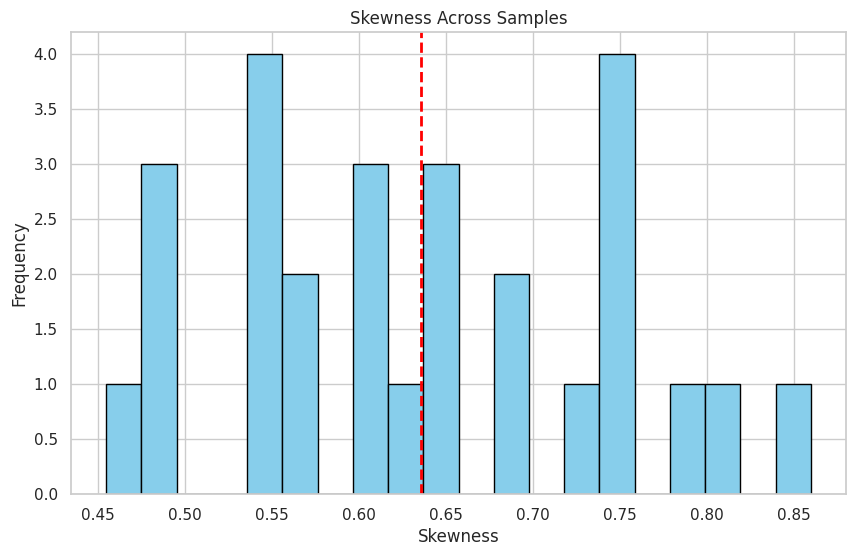

In [ ]:
def plot_skewness_histogram(summary_df):
    plt.figure(figsize=(10, 6))
    plt.hist(summary_df['Skewness'], bins=20, color='skyblue', edgecolor='black')
    plt.axvline(summary_df['Skewness'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.title('Skewness Across Samples')
    plt.xlabel('Skewness')
    plt.ylabel('Frequency')
    plt.show()

plot_skewness_histogram(skewness_kurtosis_df)

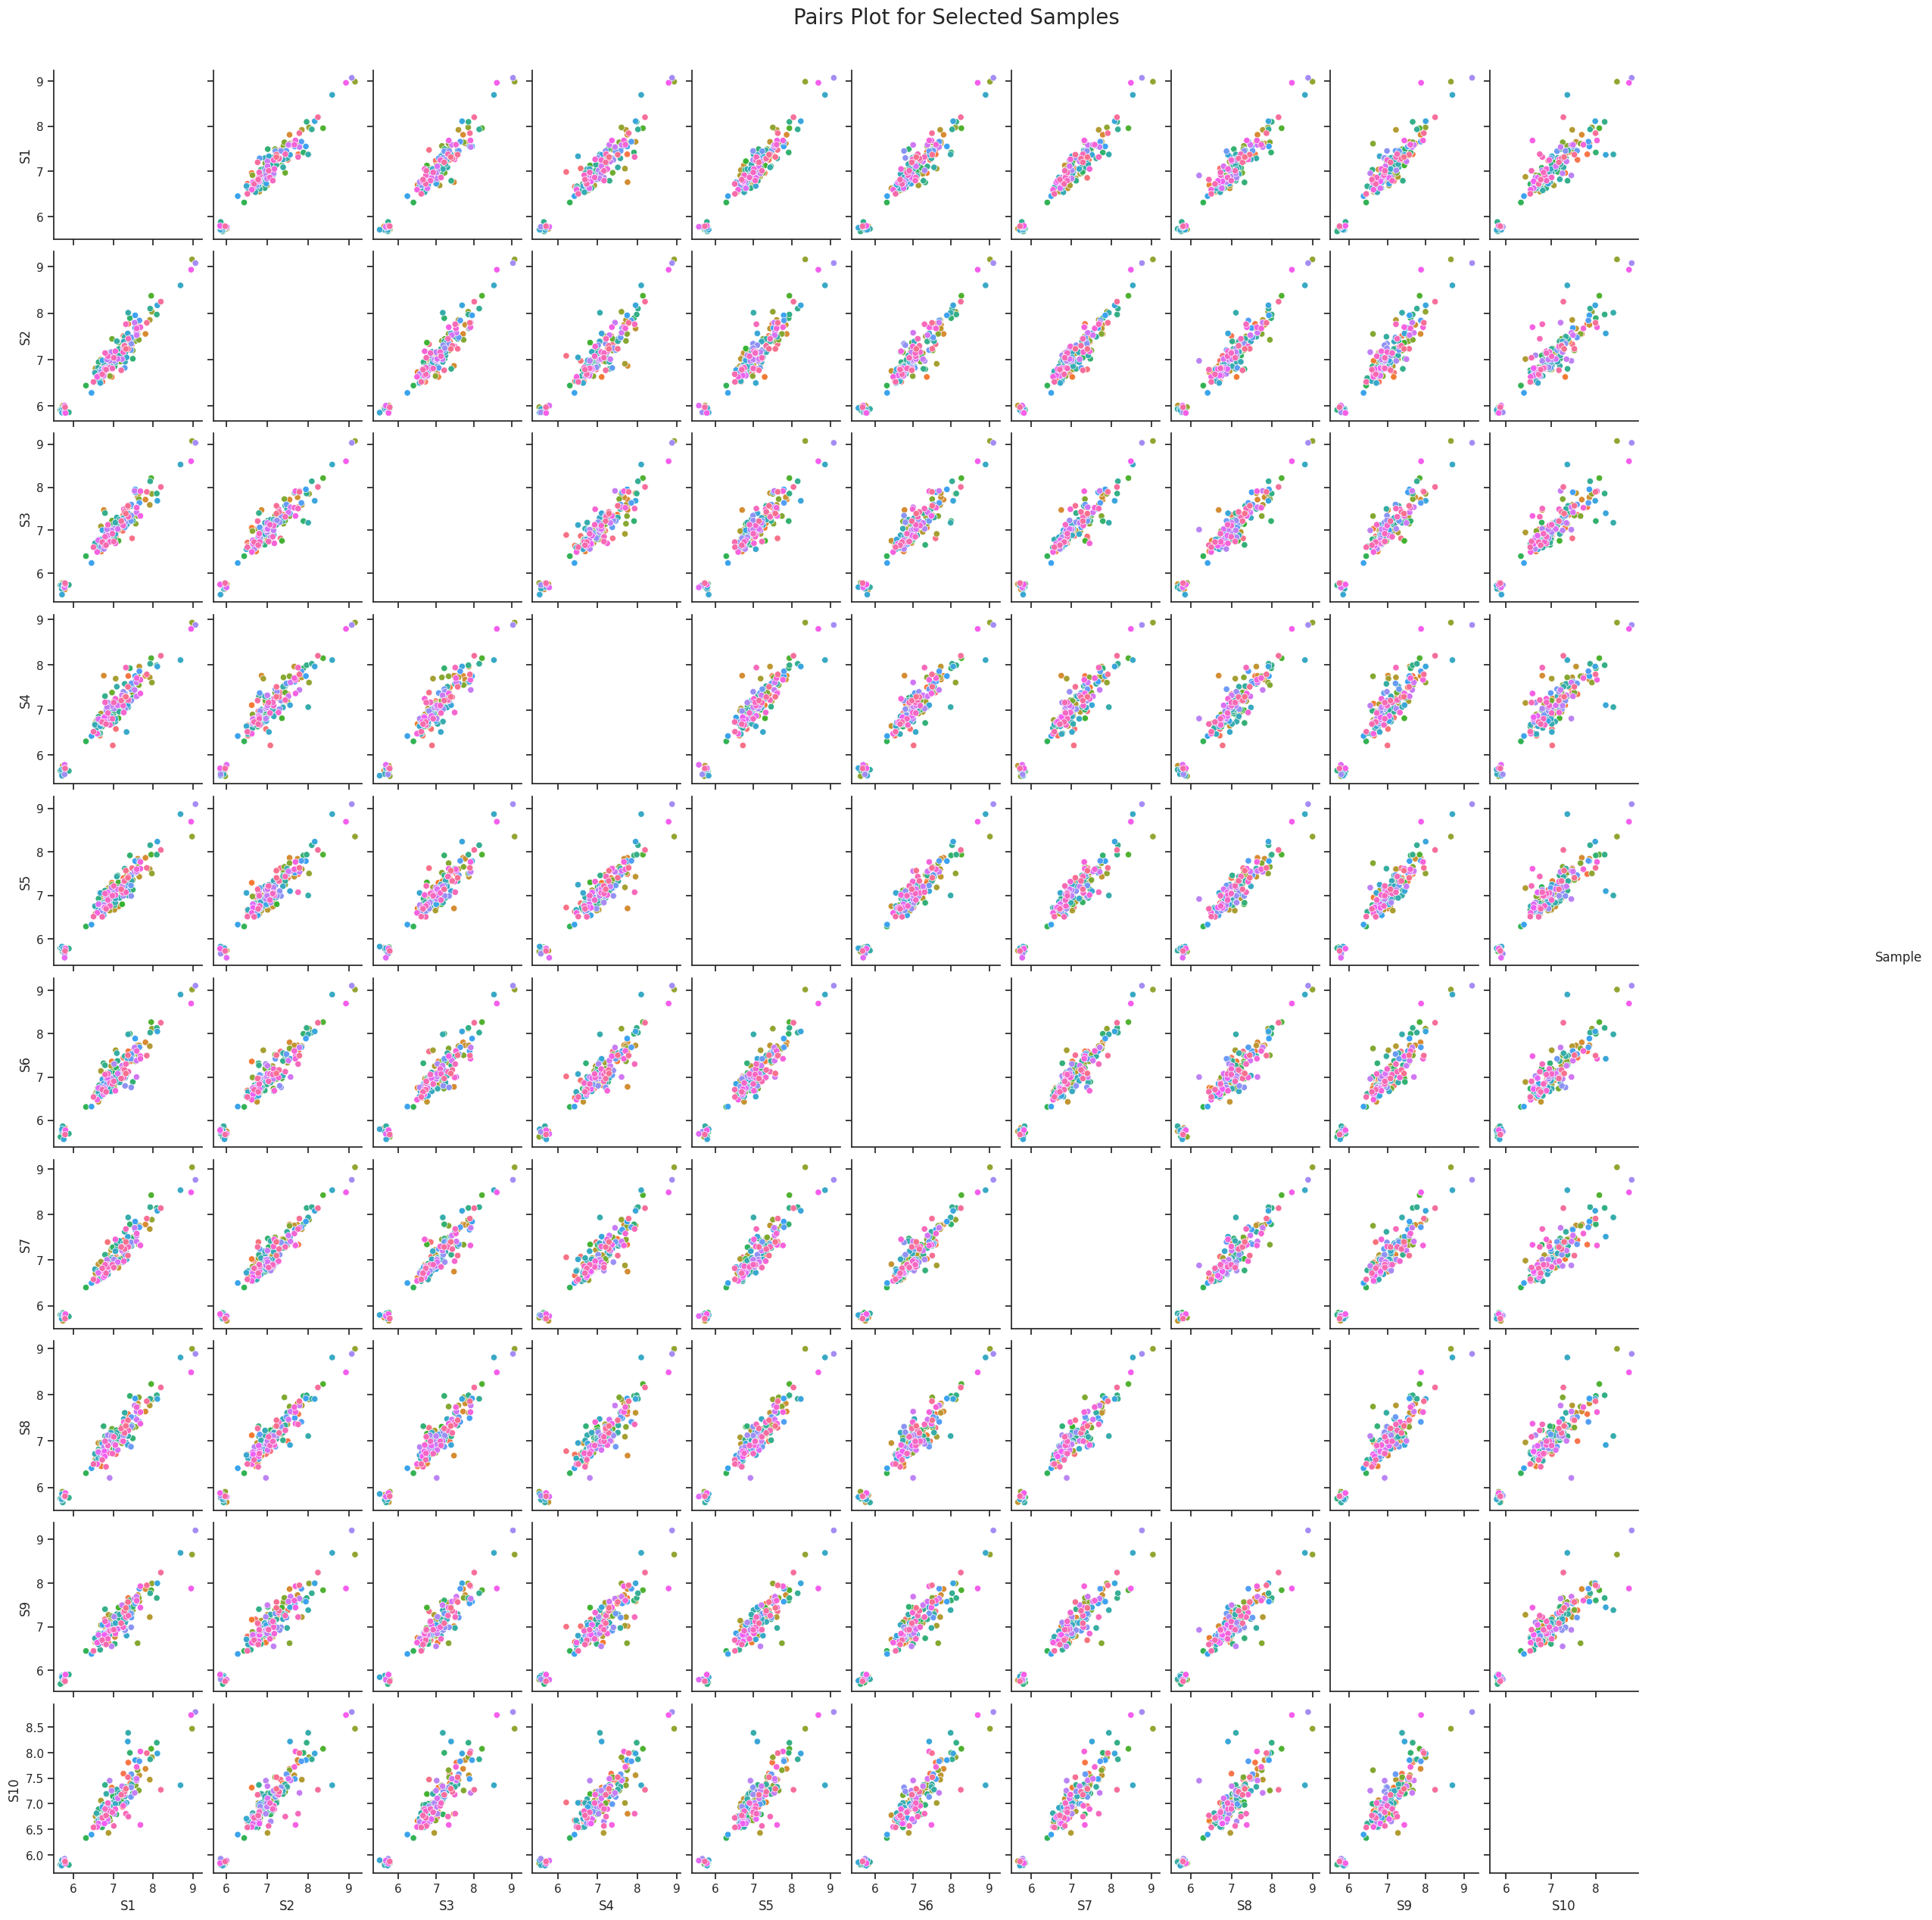

In [ ]:
def plot_pairs_plot(sample_ids, data):
    # Selection of the relevant columns based on the sample IDs
    selected_data = data[['Sample'] + sample_ids][:180]

    # Creating a pairs plot using Seaborn
    sns.set(style="ticks")
    pairs_plot = sns.pairplot(selected_data, hue='Sample', palette='husl', height=2.5,plot_kws={'legend': False})

    # Adjusting layout
    pairs_plot.fig.suptitle('Pairs Plot for Selected Samples', y=1.02,fontsize = 20)

    # Adjusting legend size and position
    pairs_plot.fig.subplots_adjust(right=0.85)

    plt.show()


sample_ids_to_plot = ['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10']  # Replace with your desired sample IDs
plot_pairs_plot(sample_ids_to_plot, input_data)


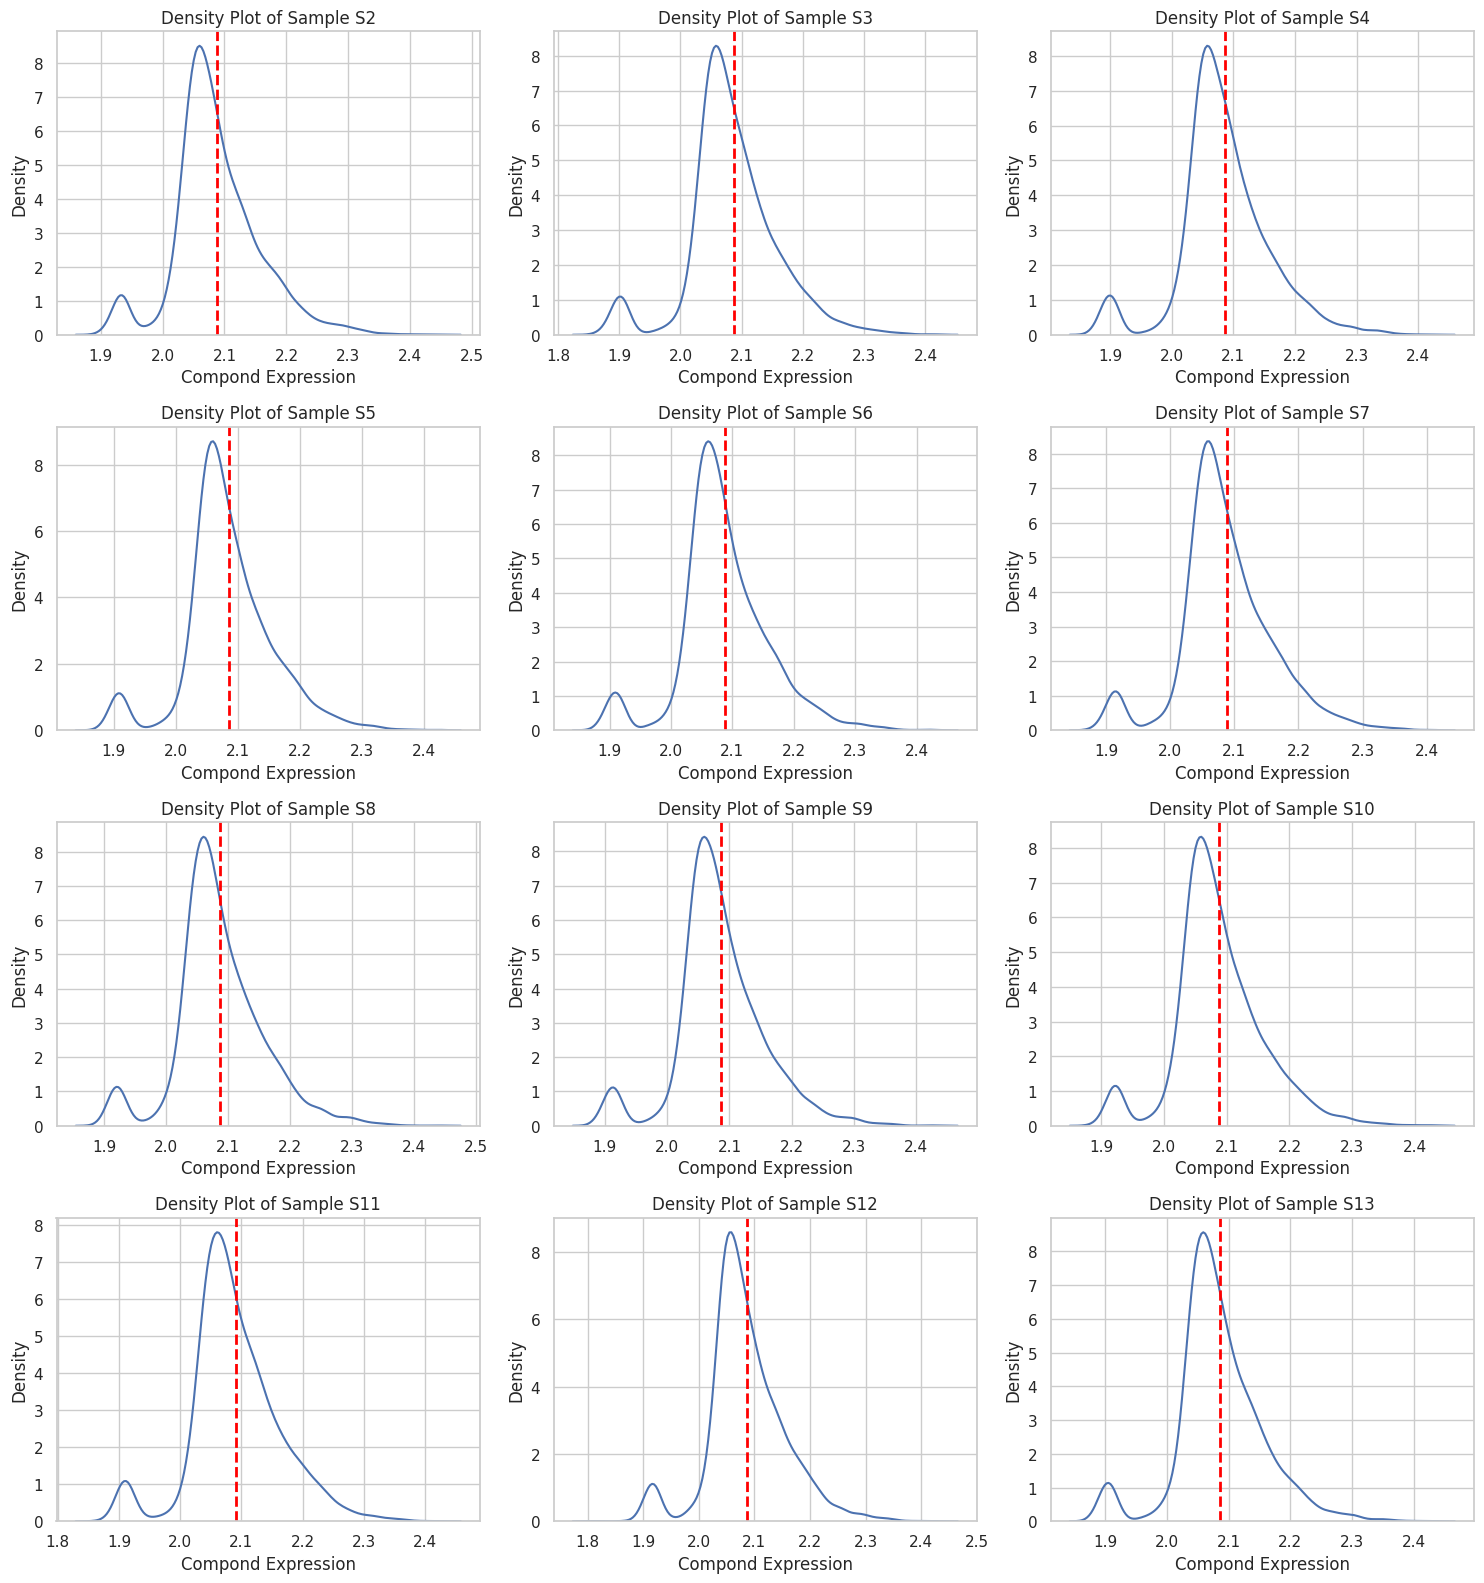

In [ ]:
# Log transformation of the compound expression data
log_transformed_data = np.log1p(input_data.iloc[:, 1:])
sns.set_style('whitegrid')

sample_ids_to_plot = log_transformed_data.columns[1:13]
plot_density_for_samples(sample_ids_to_plot, log_transformed_data)

In [ ]:
def pearson_correlation_with_pvalues(data):
    num_samples = data.shape[1]
    corr_matrix = np.zeros((num_samples, num_samples))
    pvalue_matrix = np.zeros((num_samples, num_samples))

    for i in range(num_samples):
        for j in range(num_samples):
            corr, p_value = pearsonr(data.iloc[:, i], data.iloc[:, j])
            corr_matrix[i, j] = corr
            pvalue_matrix[i, j] = p_value

    corr_df = pd.DataFrame(corr_matrix, index=data.columns, columns=data.columns)
    pvalue_df = pd.DataFrame(pvalue_matrix, index=data.columns, columns=data.columns)

    return corr_df, pvalue_df

log_transformed_data = np.log1p(input_data.iloc[:, 1:])
pearson_corr, pvalues = pearson_correlation_with_pvalues(log_transformed_data)

In [ ]:
pearson_corr

S1        S2        S3        S4        S5        S6        S7  \
S1   1.000000  0.936967  0.937226  0.936629  0.936405  0.934206  0.933721   
S2   0.936967  1.000000  0.933517  0.931886  0.928782  0.932772  0.934060   
S3   0.937226  0.933517  1.000000  0.942928  0.936963  0.938692  0.935752   
S4   0.936629  0.931886  0.942928  1.000000  0.940002  0.939673  0.935010   
S5   0.936405  0.928782  0.936963  0.940002  1.000000  0.935848  0.930702   
S6   0.934206  0.932772  0.938692  0.939673  0.935848  1.000000  0.934045   
S7   0.933721  0.934060  0.935752  0.935010  0.930702  0.934045  1.000000   
S8   0.938630  0.933752  0.939406  0.941585  0.936141  0.936451  0.932696   
S9   0.932707  0.927686  0.929067  0.929758  0.930347  0.926729  0.923655   
S10  0.918707  0.914751  0.917287  0.915635  0.915456  0.914089  0.911855   
S11  0.919131  0.915473  0.915211  0.918790  0.911506  0.916237  0.921884   
S12  0.931218  0.923515  0.927547  0.929155  0.929928  0.924661  0.927315   
S13  0.924612  0.918615  0.923819  0.923521  0.924352  0.919807  0.923469   
S14  0.928361  0.925864  0.925588  0.925834  0.929446  0.923015  0.926341   
S15  0.929514  0.922292  0.928384  0.928990  0.931583  0.923953  0.926150   
S16  0.932435  0.925161  0.926408  0.927752  0.929215  0.928676  0.923246   
S17  0.931382  0.929054  0.927132  0.928601  0.926746  0.929622  0.925351   
S18  0.934700  0.930209  0.937614  0.937041  0.934296  0.931882  0.931353   
S19  0.926837  0.927166  0.923900  0.925357  0.926898  0.925939  0.927079   
S20  0.931616  0.926134  0.928440  0.932569  0.931123  0.925344  0.924210   
S21  0.920940  0.913900  0.919017  0.919761  0.917428  0.914153  0.915547   
S22  0.930569  0.928023  0.926850  0.928261  0.922887  0.926958  0.929779   
S23  0.923632  0.917703  0.923535  0.924296  0.925757  0.919016  0.920464   
S24  0.921754  0.917687  0.922058  0.922879  0.924002  0.918515  0.918331   
S25  0.924604  0.921799  0.918761  0.923876  0.923689  0.919905  0.919215   
S26  0.919316  0.918284  0.916336  0.919489  0.920678  0.913810  0.911553   
S27  0.924811  0.920806  0.918830  0.921987  0.925696  0.915217  0.916329   
S28  0.928418  0.919913  0.925207  0.925201  0.927086  0.919855  0.920749   

           S8        S9       S10  ...       S19       S20       S21  \
S1   0.938630  0.932707  0.918707  ...  0.926837  0.931616  0.920940   
S2   0.933752  0.927686  0.914751  ...  0.927166  0.926134  0.913900   
S3   0.939406  0.929067  0.917287  ...  0.923900  0.928440  0.919017   
S4   0.941585  0.929758  0.915635  ...  0.925357  0.932569  0.919761   
S5   0.936141  0.930347  0.915456  ...  0.926898  0.931123  0.917428   
S6   0.936451  0.926729  0.914089  ...  0.925939  0.925344  0.914153   
S7   0.932696  0.923655  0.911855  ...  0.927079  0.924210  0.915547   
S8   1.000000  0.928279  0.913755  ...  0.929026  0.929797  0.916894   
S9   0.928279  1.000000  0.918083  ...  0.928051  0.931509  0.918101   
S10  0.913755  0.918083  1.000000  ...  0.914950  0.922631  0.922092   
S11  0.913512  0.914788  0.904666  ...  0.913917  0.909998  0.904331   
S12  0.929286  0.929706  0.920028  ...  0.926958  0.933189  0.921054   
S13  0.922977  0.923593  0.915437  ...  0.924894  0.931568  0.920997   
S14  0.927107  0.924842  0.917713  ...  0.928534  0.930617  0.923320   
S15  0.928889  0.929513  0.918187  ...  0.930128  0.934591  0.925200   
S16  0.926241  0.923904  0.916468  ...  0.925786  0.927378  0.916126   
S17  0.928379  0.924605  0.913422  ...  0.930431  0.929083  0.916266   
S18  0.933494  0.932085  0.918563  ...  0.929663  0.935450  0.925909   
S19  0.929026  0.928051  0.914950  ...  1.000000  0.930016  0.918943   
S20  0.929797  0.931509  0.922631  ...  0.930016  1.000000  0.925056   
S21  0.916894  0.918101  0.922092  ...  0.918943  0.925056  1.000000   
S22  0.927179  0.925599  0.921949  ...  0.927529  0.928367  0.923423   
S23  0.924719  0.925721  0.912459  ...  0.926565  0.935353  0.921198   
S24  0.919893  0.924215  0.927696  ...  0.923046 

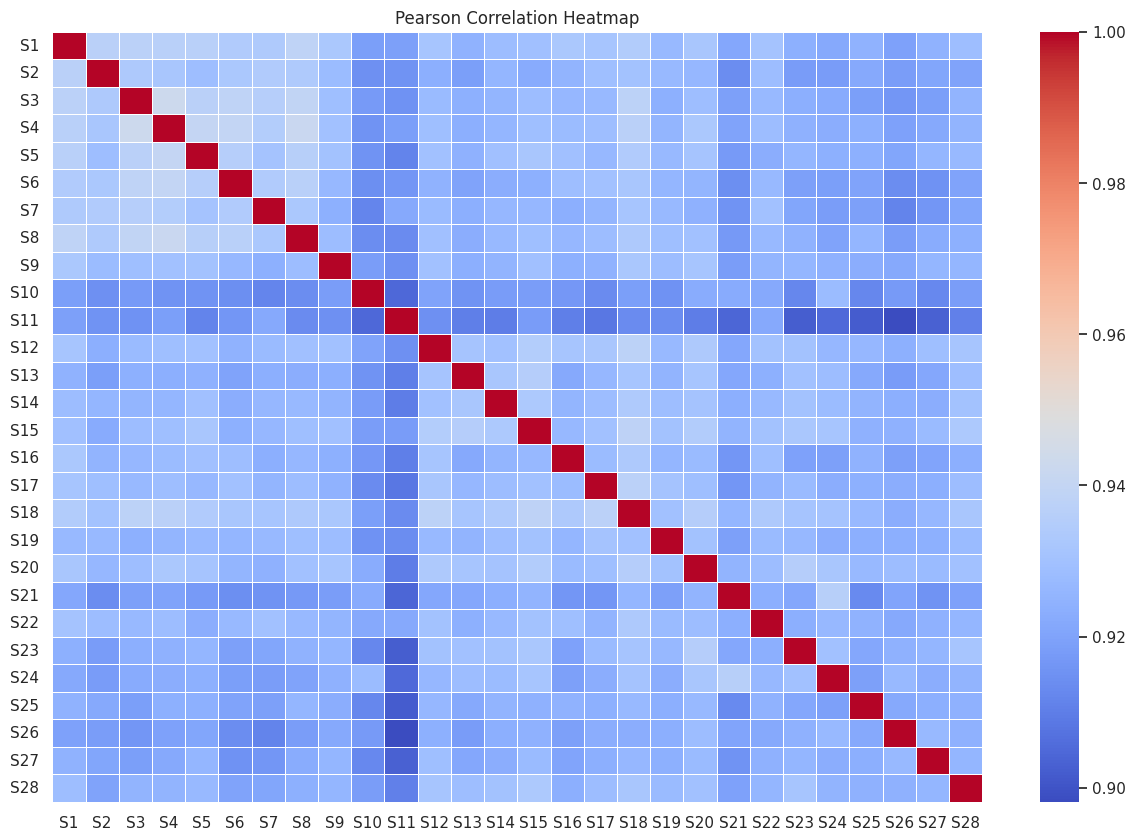

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(pearson_corr.iloc[:250,:250], cmap='coolwarm', annot=False, fmt=".2f",linewidth= 0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

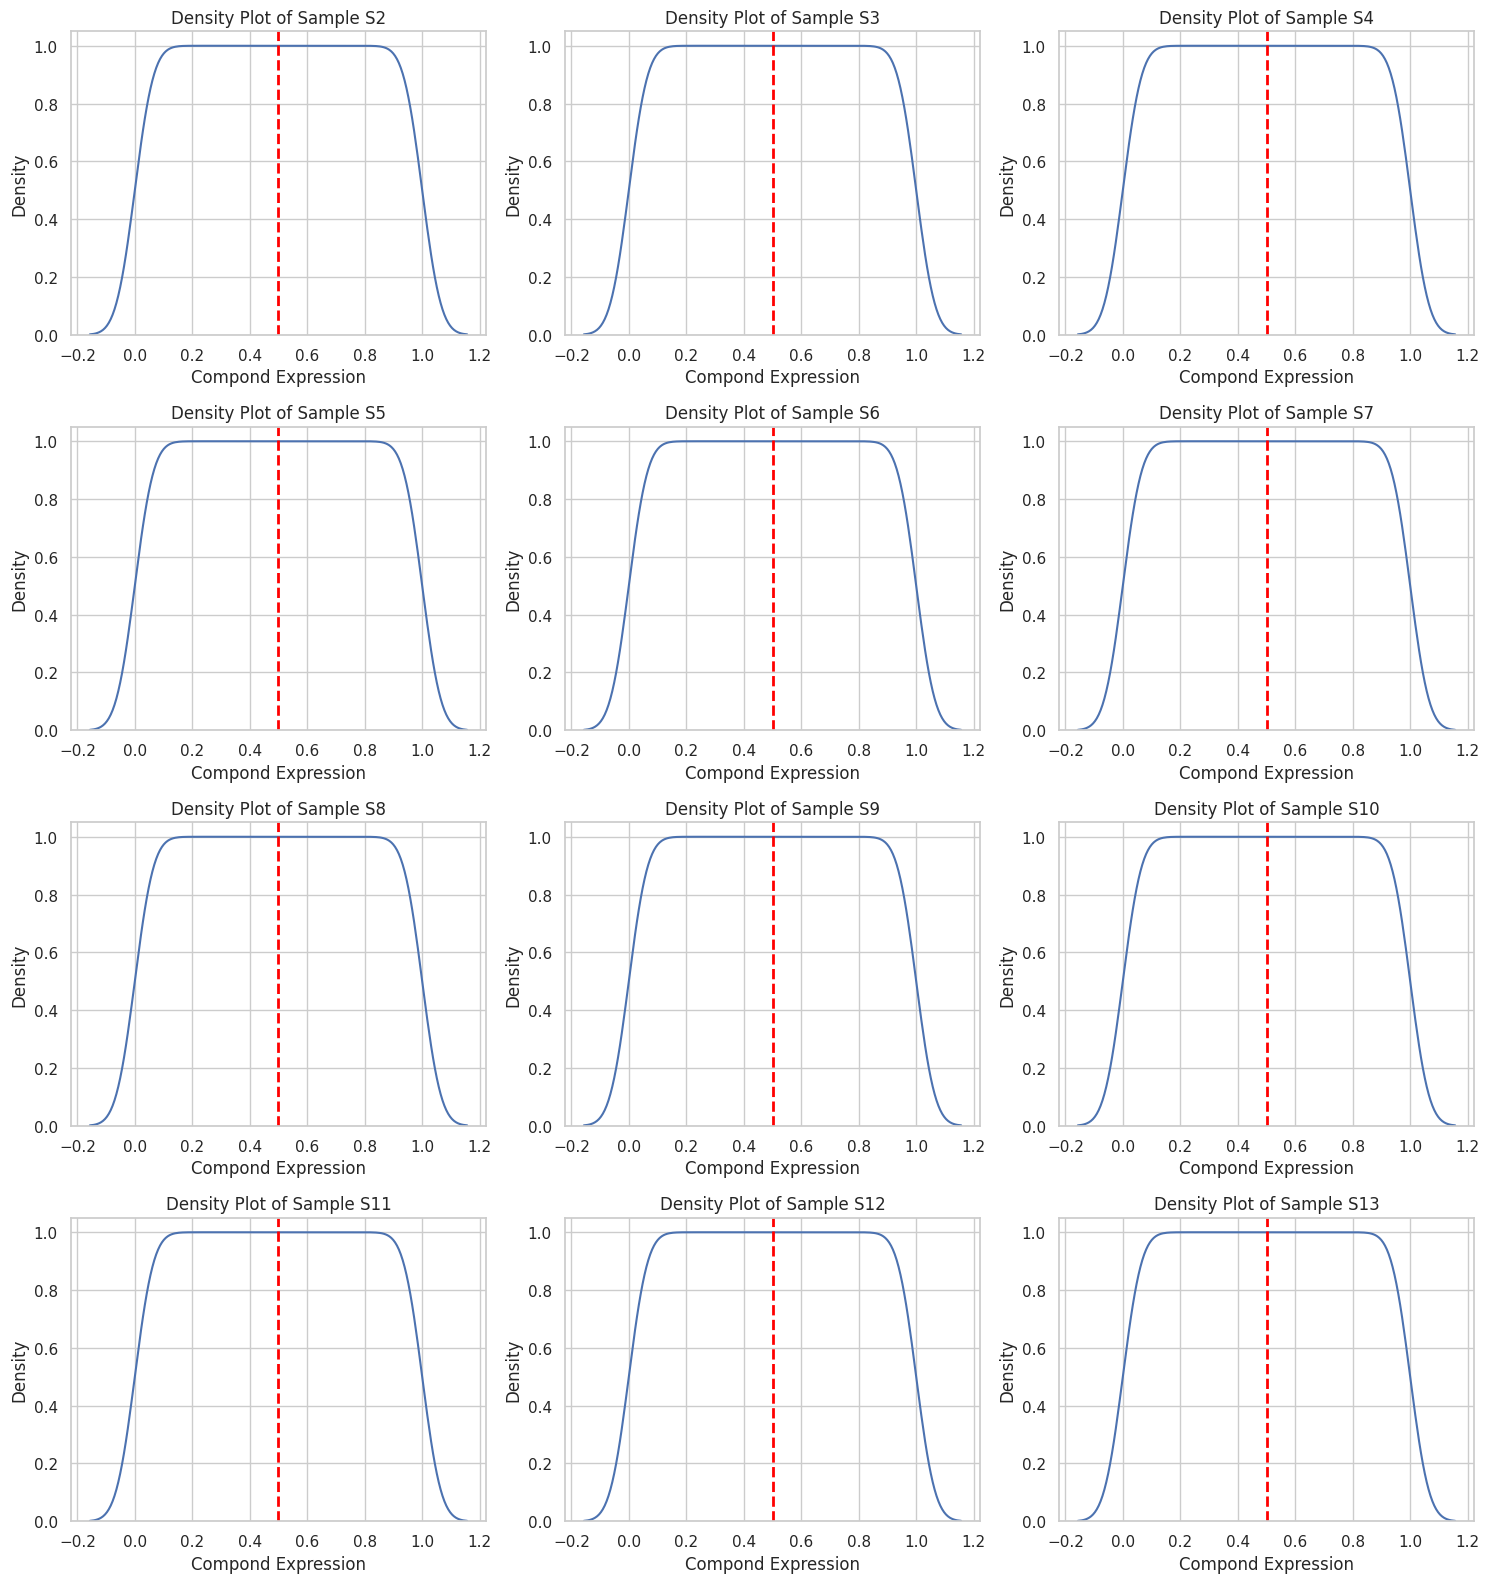

In [ ]:
def quantile_normalization(log_transformed_data, sample_ids):
    normalized_data = log_transformed_data.copy()

    for sample_id in sample_ids:
        # Sort the data for each sample
        sorted_data = np.sort(log_transformed_data[sample_id])

        # Replace each data point with its quantile value
        quantiles = np.linspace(0, 1, len(sorted_data))
        normalized_data[sample_id] = np.interp(log_transformed_data[sample_id], sorted_data, quantiles)

    return normalized_data

normalized_data = quantile_normalization(log_transformed_data, log_transformed_data.columns)
sample_ids_to_plot = normalized_data.columns[1:13]
plot_density_for_samples(sample_ids_to_plot, normalized_data)


In [ ]:
def median_normalization(log_transformed_data, sample_ids):
    normalized_data = log_transformed_data.copy()

    for sample_id in sample_ids:
        # Subtracting the median value of each sample from every data point to eliminate the overall shift in distribution
        normalized_data[sample_id] = log_transformed_data[sample_id] - log_transformed_data[sample_id].median()

    return normalized_data

normalized_data = median_normalization(log_transformed_data, log_transformed_data.columns)
normalized_data

S1        S2        S3        S4        S5        S6        S7  \
1     0.058810  0.041429 -0.022500  0.048179  0.078319  0.072288  0.050444   
2    -0.000208  0.011016 -0.012580 -0.102326 -0.032368  0.002791  0.008766   
3    -0.021790 -0.015491 -0.018456 -0.008572 -0.018020 -0.032268 -0.020744   
4    -0.016744 -0.025856 -0.016808 -0.002559 -0.003638 -0.005239  0.049340   
5     0.009445 -0.002534 -0.015266 -0.053018 -0.019558 -0.008612  0.010769   
...        ...       ...       ...       ...       ...       ...       ...   
5201 -0.098023 -0.105116 -0.108817 -0.078038 -0.074602 -0.096182 -0.095483   
5202 -0.095167 -0.094742 -0.090732 -0.083929 -0.074501 -0.081942 -0.101028   
5203 -0.098439 -0.114893 -0.107266 -0.120710 -0.086236 -0.096331 -0.100900   
5204 -0.110162 -0.127872 -0.113838 -0.125836 -0.123392 -0.113622 -0.126524   
5205 -0.178783 -0.149078 -0.166388 -0.188681 -0.146937 -0.183224 -0.146505   

            S8        S9       S10  ...       S19       S20       S21  \
1     0.037113  0.044954  0.058566  ...  0.064028  0.056034  0.042097   
2    -0.025589  0.001746  0.004193  ...  0.015076 -0.011139 -0.016759   
3    -0.024250 -0.017944 -0.013143  ... -0.030137 -0.017722 -0.023014   
4    -0.008590 -0.037645 -0.004548  ...  0.001953 -0.008906 -0.014007   
5    -0.033834  0.003059  0.003426  ... -0.016088 -0.000338 -0.003842   
...        ...       ...       ...  ...       ...       ...       ...   
5201 -0.080134 -0.096033 -0.085083  ... -0.093308 -0.090710 -0.108345   
5202 -0.092810 -0.089608 -0.090918  ... -0.086362 -0.073385 -0.079123   
5203 -0.092134 -0.089289 -0.102695  ... -0.102716 -0.099608 -0.111412   
5204 -0.125599 -0.115414 -0.129838  ... -0.108211 -0.112822 -0.113523   
5205 -0.145220 -0.173521 -0.177025  ... -0.139820 -0.170482 -0.210328   

           S22       S23       S24       S25       S26       S27       S28  
1     0.045930  0.054713  0.045390  0.083017  0.052530  0.054364  0.047399  
2     0.008849 -0.027570 -0.014774 -0.032820 -0.020142 -0.029702 -0.025918  
3    -0.029566 -0.024138 -0.031173 -0.015197 -0.009410 -0.017204 -0.009323  
4    -0.009673 -0.001246 -0.028568 -0.005974 -0.023994 -0.012742 -0.001190  
5    -0.009262 -0.005429  0.017032  0.000044 -0.004895  0.007339 -0.002448  
...        ...       ...       ...       ...       ...       ...       ...  
5201 -0.095544 -0.076043 -0.084482 -0.110438 -0.080516 -0.096363 -0.094715  
5202 -0.083175 -0.078661 -0.075520 -0.079866 -0.082627 -0.083056 -0.078810  
5203 -0.094717 -0.102827 -0.103903 -0.089723 -0.093576 -0.105489 -0.100335  
5204 -0.118911 -0.116120 -0.120211 -0.122656 -0.103147 -0.131271 -0.131027  
5205 -0.159745 -0.164529 -0.174322 -0.142699 -0.166783 -0.146464 -0.163026  

[5205 rows x 28 columns]

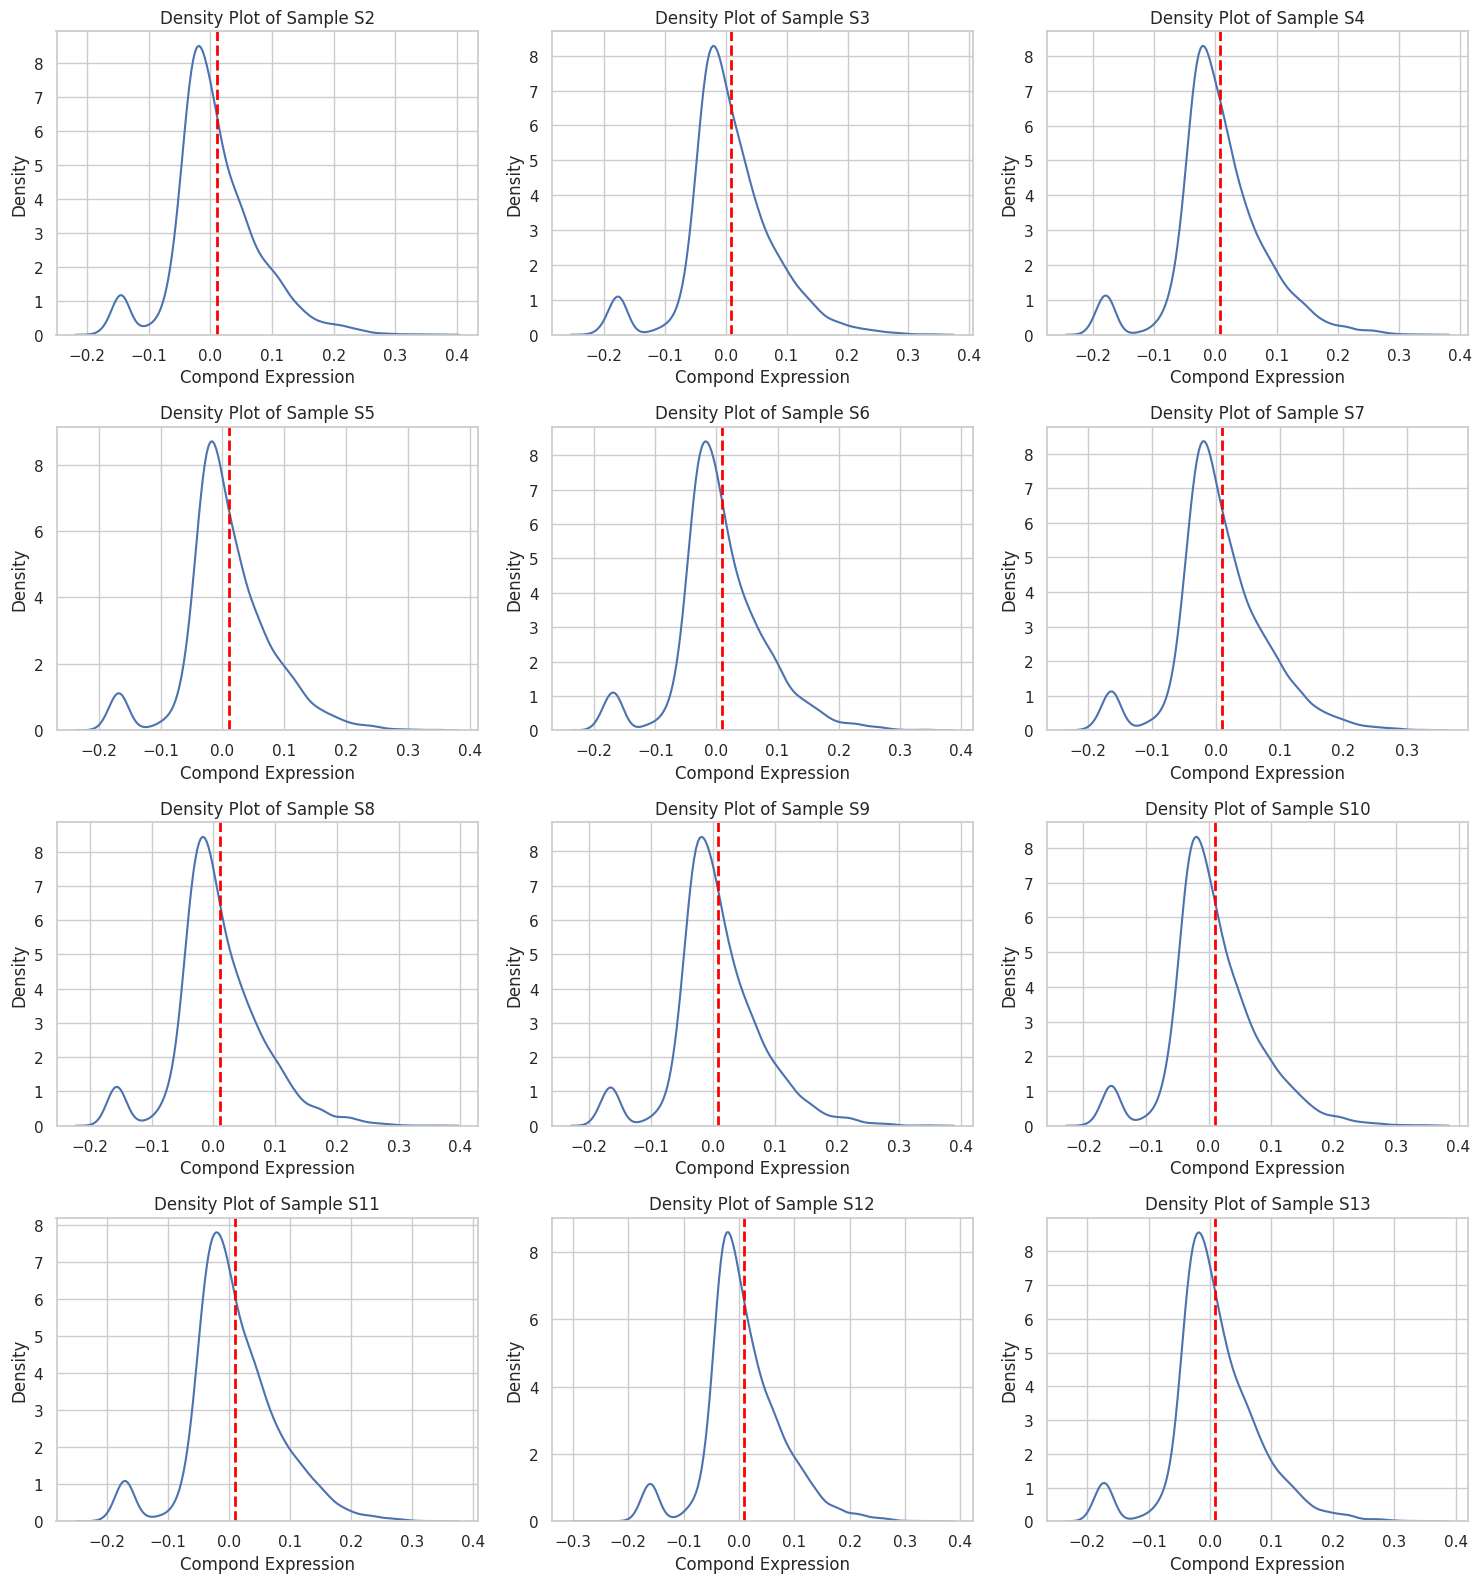

In [ ]:
sample_ids_to_plot = normalized_data.columns[1:13]
plot_density_for_samples(sample_ids_to_plot, normalized_data)

<ipython-input-22-df3d69946655>:6: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_value = normalized_data[sample_id].mad()


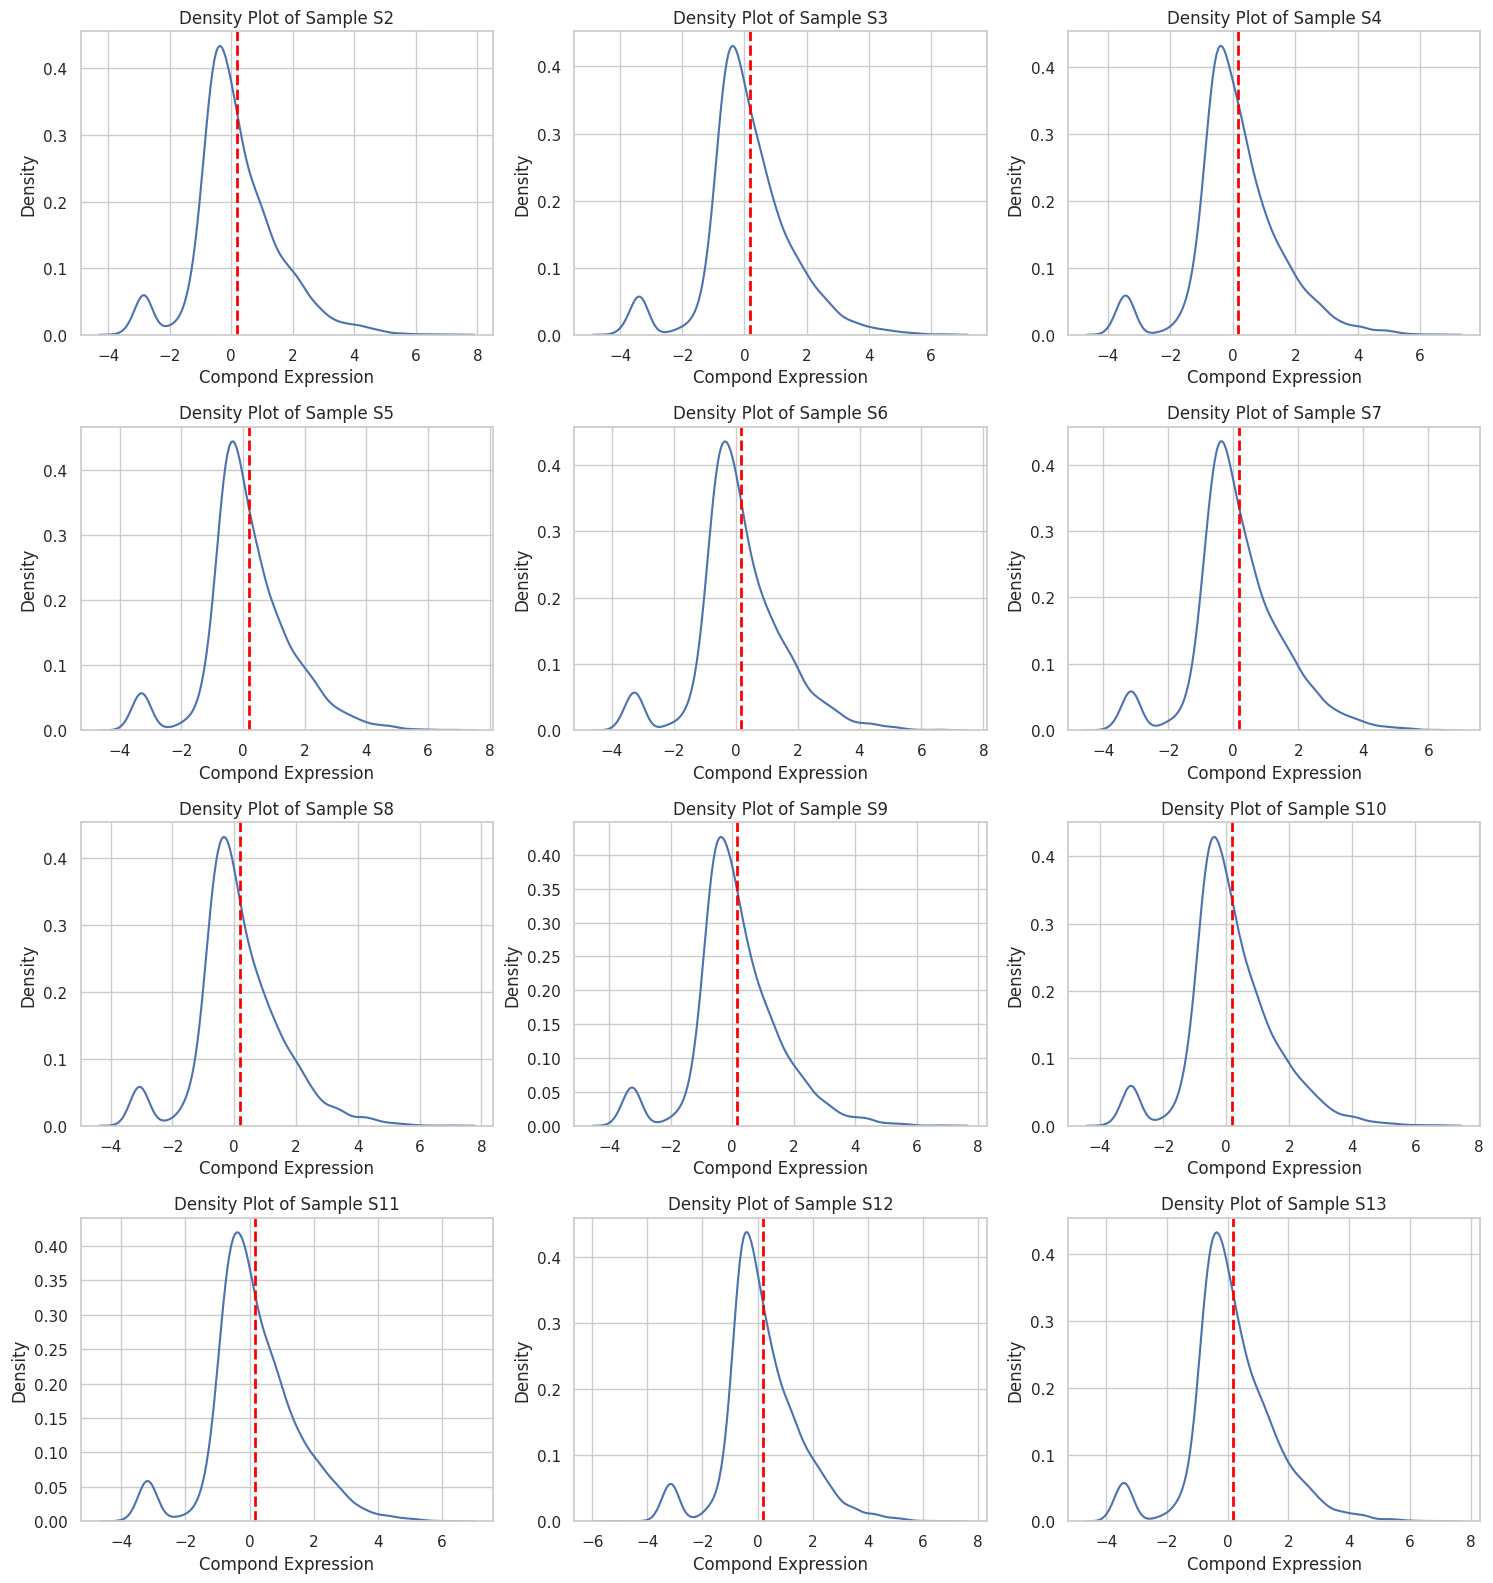

In [ ]:
def mad_scaling(normalized_data, sample_ids):
    scaled_data = normalized_data.copy()

    for sample_id in sample_ids:
        # Calculate the median absolute deviation (MAD)
        mad_value = normalized_data[sample_id].mad()

        # Scale each data point by dividing it by the MAD99
        9099
        scaled_data[sample_id] = normalized_data[sample_id] / mad_value

    return scaled_data

scaled_data = mad_scaling(normalized_data, normalized_data.columns)
sample_ids_to_plot = scaled_data.columns[1:13]
plot_density_for_samples(sample_ids_to_plot, scaled_data)

In [ ]:
scaled_data['Sample'] = input_data['Sample']
scaled_data

S1        S2        S3        S4        S5        S6        S7  \
1     1.135529  0.812427 -0.432729  0.925764  1.536633  1.394483  0.968795   
2    -0.004022  0.216021 -0.241949 -1.966190 -0.635059  0.053849  0.168357   
3    -0.420722 -0.303773 -0.354959 -0.164704 -0.353554 -0.622483 -0.398406   
4    -0.323304 -0.507035 -0.323254 -0.049172 -0.071382 -0.101056  0.947606   
5     0.182370 -0.049697 -0.293593 -1.018744 -0.383725 -0.166141  0.206826   
...        ...       ...       ...       ...       ...       ...       ...   
5201 -1.892678 -2.061357 -2.092800 -1.499502 -1.463703 -1.855417 -1.833798   
5202 -1.837528 -1.857917 -1.744996 -1.612703 -1.461738 -1.580735 -1.940303   
5203 -1.900699 -2.253079 -2.062972 -2.319447 -1.691971 -1.858302 -1.937830   
5204 -2.127055 -2.507603 -2.189369 -2.417938 -2.420981 -2.191849 -2.429949   
5205 -3.452014 -2.923461 -3.200032 -3.625503 -2.882946 -3.534540 -2.813693   

            S8        S9       S10  ...       S20       S21       S22  \
1     0.726025  0.887628  1.135771  ...  1.106226  0.799211  0.877255   
2    -0.500576  0.034475  0.081309  ... -0.219909 -0.318159  0.169012   
3    -0.474390 -0.354314 -0.254876  ... -0.349871 -0.436925 -0.564692   
4    -0.168036 -0.743302 -0.088209  ... -0.175816 -0.265911 -0.184755   
5    -0.661881  0.060392  0.066445  ... -0.006667 -0.072935 -0.176906   
...        ...       ...       ...  ...       ...       ...       ...   
5201 -1.567616 -1.896187 -1.650021  ... -1.790812 -2.056909 -1.824860   
5202 -1.815584 -1.769324 -1.763194  ... -1.448791 -1.502132 -1.588606   
5203 -1.802352 -1.763025 -1.991589  ... -1.966477 -2.115125 -1.809058   
5204 -2.457010 -2.278880 -2.517977  ... -2.227353 -2.155209 -2.271148   
5205 -2.840837 -3.426206 -3.433085  ... -3.365698 -3.993034 -3.051077   

           S23       S24       S25       S26       S27       S28  \
1     1.100089  0.874666  1.674189  1.052712  1.102056  0.931267   
2    -0.554326 -0.284685 -0.661868 -0.403648 -0.602111 -0.509223   
3    -0.485335 -0.600707 -0.306472 -0.188585 -0.348749 -0.183174   
4    -0.025055 -0.550506 -0.120483 -0.480848 -0.258298 -0.023388   
5    -0.109164  0.328212  0.000888 -0.098101  0.148781 -0.048102   
...        ...       ...       ...       ...       ...       ...   
5201 -1.528956 -1.627951 -2.227171 -1.613560 -1.953449 -1.860898   
5202 -1.581592 -1.455259 -1.610636 -1.655878 -1.683688 -1.548400   
5203 -2.067481 -2.002187 -1.809430 -1.875286 -2.138448 -1.971309   
5204 -2.334757 -2.316445 -2.473577 -2.067098 -2.661096 -2.574340   
5205 -3.308086 -3.359149 -2.877768 -3.342389 -2.969092 -3.203018   

             Sample  
1      Compound 468  
2     Compound 3382  
3     Compound 4793  
4     Compound 2186  
5     Compound 4227  
...             ...  
5201  Compound 5919  
5202  Compound 5930  
5203  Compound 5964  
5204  Compound 5978  
5205  Compound 5980  

[5205 rows x 29 columns]

In [ ]:
def perform_compound_pca(scaled_data, n_components=5):
    # Transpose the DataFrame so that each row is a gene
    transposed_data = scaled_data.set_index('Sample').T

    pca_list = []
    feature_weight_list = []

    for n in range(1, n_components + 1):
        PCAmod = PCA(n_components=n)
        PCAmod.fit(transposed_data)

        pca_list.append(pd.Series({
            'n': n,
            'model': PCAmod,
            'var': PCAmod.explained_variance_ratio_.sum()
        }))

        weights = PCAmod.explained_variance_ratio_.reshape(-1, 1) / PCAmod.explained_variance_ratio_.sum()
        overall_contributions = np.abs(PCAmod.components_) * weights
        abs_feature_values = overall_contributions.sum(axis=0)
        feature_weight_list.append(pd.DataFrame({
            'n': n,
            'features': transposed_data.columns,
            'values': abs_feature_values / abs_feature_values.sum(),
        }))

    pca_report = pd.concat(pca_list, axis=1).T.set_index('n')
    feature_importance_report = pd.concat(feature_weight_list).pivot(index='n', columns='features', values='values')

    return pca_report, feature_importance_report

# Example usage:
n_components = 28  # You can adjust the number of components as needed
compound_pca_report, compound_feature_importance_report = perform_compound_pca(scaled_data, n_components)

In [ ]:
compound_pca_report

model       var
n                                 
1    PCA(n_components=1)  0.079194
2    PCA(n_components=2)  0.136131
3    PCA(n_components=3)   0.18673
4    PCA(n_components=4)  0.235761
5    PCA(n_components=5)  0.277893
6    PCA(n_components=6)  0.317473
7    PCA(n_components=7)  0.355647
8    PCA(n_components=8)   0.39359
9    PCA(n_components=9)  0.430435
10  PCA(n_components=10)  0.466763
11  PCA(n_components=11)  0.502912
12  PCA(n_components=12)  0.538723
13  PCA(n_components=13)  0.572978
14  PCA(n_components=14)  0.606992
15  PCA(n_components=15)  0.641393
16  PCA(n_components=16)  0.674466
17  PCA(n_components=17)  0.707876
18  PCA(n_components=18)  0.739955
19  PCA(n_components=19)  0.771083
20  PCA(n_components=20)    0.8018
21  PCA(n_components=21)  0.831753
22  PCA(n_components=22)  0.861553
23  PCA(n_components=23)  0.890494
24  PCA(n_components=24)  0.918846
25  PCA(n_components=25)  0.946557
26  PCA(n_components=26)   0.97351
27  PCA(n_components=27)       1.0
28  PCA(n_components=28)       1.0

In [ ]:
compound_feature_importance_report

features  Compound 1  Compound 10  Compound 100  Compound 1000  Compound 1001  \
n                                                                               
1           0.000058     0.001066      0.000008       0.000261       0.000093   
2           0.000272     0.000835      0.000061       0.000221       0.000133   
3           0.000335     0.000608      0.000063       0.000211       0.000086   
4           0.000327     0.000525      0.000069       0.000199       0.000139   
5           0.000273     0.000618      0.000120       0.000198       0.000170   
6           0.000301     0.000589      0.000130       0.000206       0.000185   
7           0.000344     0.000538      0.000117       0.000181       0.000203   
8           0.000289     0.000523      0.000085       0.000184       0.000205   
9           0.000297     0.000518      0.000102       0.000201       0.000155   
10          0.000303     0.000545      0.000140       0.000175       0.000235   
11          0.000270     0.000533      0.000144       0.000191       0.000257   
12          0.000269     0.000518      0.000135       0.000192       0.000262   
13          0.000282     0.000572      0.000158       0.000181       0.000236   
14          0.000313     0.000527      0.000127       0.000174       0.000198   
15          0.000297     0.000515      0.000126       0.000181       0.000228   
16          0.000325     0.000506      0.000178       0.000165       0.000203   
17          0.000318     0.000481      0.000160       0.000168       0.000223   
18          0.000312     0.000475      0.000167       0.000161       0.000214   
19          0.000303     0.000472      0.000183       0.000157       0.000218   
20          0.000300     0.000465      0.000190       0.000164       0.000212   
21          0.000295     0.000450      0.000183       0.000164       0.000218   
22          0.000304     0.000477      0.000180       0.000164       0.000230   
23          0.000297     0.000474      0.000182       0.000164       0.000242   
24          0.000291     0.000463      0.000182       0.000162       0.000240   
25          0.000286     0.000450      0.000181       0.000164       0.000236   
26          0.000282     0.000442      0.000180       0.000167       0.000237   
27          0.000280     0.000431      0.000182       0.000169       0.000231   
28          0.000280     0.000431      0.000182       0.000169       0.000231   

features  Compound 1002  Compound 1003  Compound 1004  Compound 1005  \
n                                                                      
1              0.000194       0.000598       0.000328       0.000311   
2              0.000164       0.000411       0.000405       0.000338   
3              0.000195       0.000312       0.000262       0.000256   
4              0.000223       0.000295       0.000253       0.000289   
5              0.000208       0.000257       0.000304       0.000201   
6              0.000190       0.000256       0.000339       0.000253   
7              0.000220       0.000258       0.000351       0.000241   
8              0.000199       0.000274       0.000323       0.000236   
9              0.000194       0.000269       0.000335       0.000249   
10             0.000189       0.000245       0.000319       0.000242   
11             0.000186       0.000243       0.000322       0.000241   
12             0.000189       0.000236       0.000322       0.000216   
13             0.000180       0.000263       0.000310       0.000211   
14             0.000189       0.000262       0.000291       0.000233   
15             0.000179       0.000240       0.000292       0.000229   
16             0.000197       0.000234       0.000302       0.000225   
17             0.000193       0.000239       0.000290       0.000231   
18             0.000208       0.000229       0.000287       0.000226   
19             0.000202       0.000224       0.000288       0.000229   
20             0.000196       0.000216       0.000281    

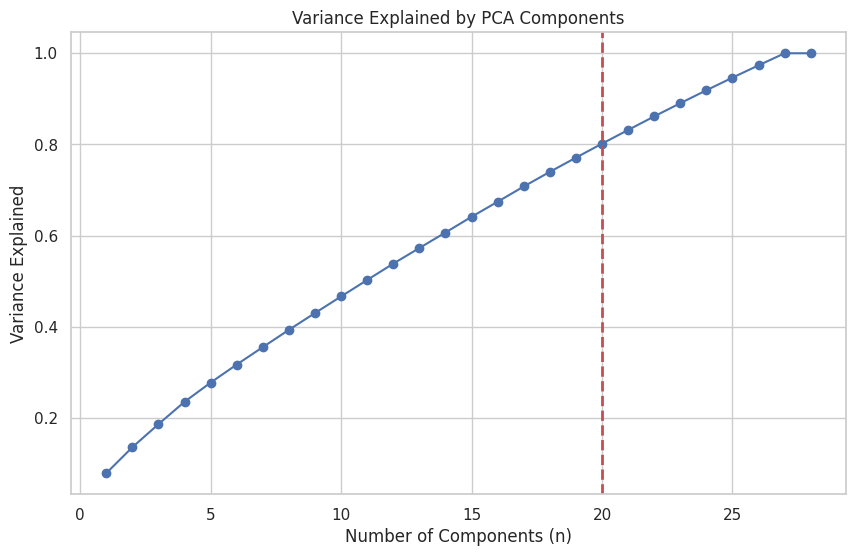

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(compound_pca_report.index, compound_pca_report['var'], marker='o', linestyle='-', color='b')
plt.title('Variance Explained by PCA Components')
plt.axvline(x=20, color='r', linestyle='--', linewidth=2, label='Threshold at x=50')
plt.xlabel('Number of Components (n)')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

[Text(0.5, 0, 'Number of components'),
 Text(0, 0.5, 'Relative Importance'),
 Text(0.5, 1.0, 'Feature Importance Vs Dimensions')]

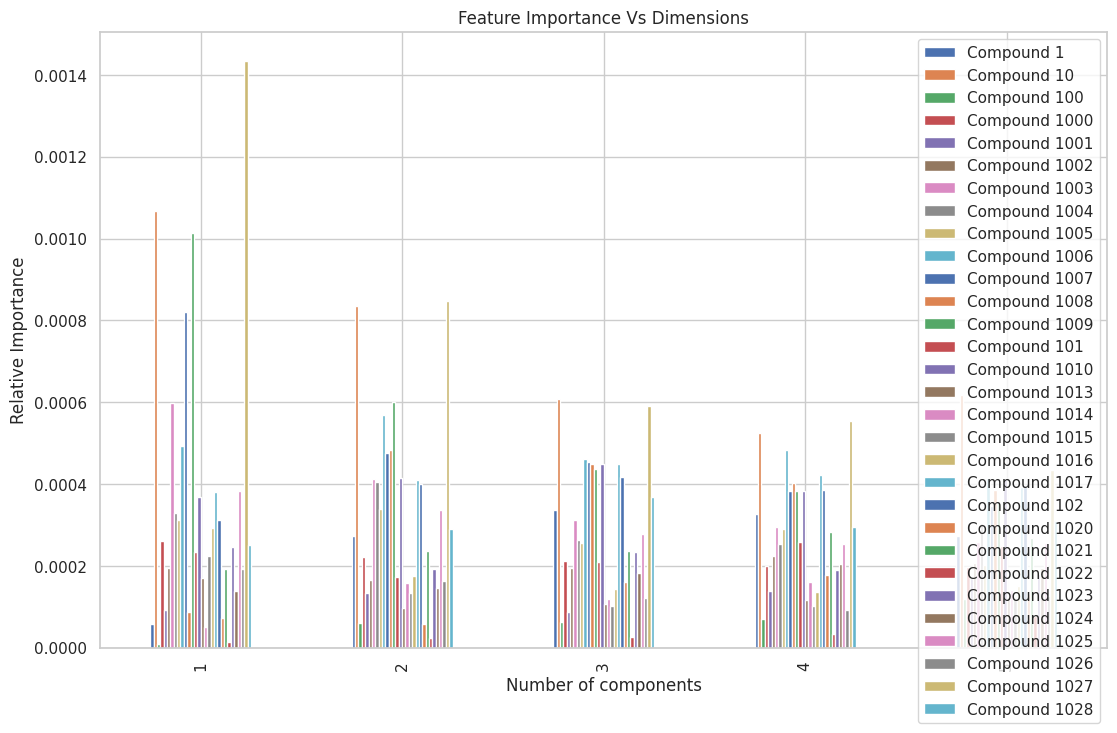

In [ ]:
ax = compound_feature_importance_report .iloc[:5,:30].plot(kind = 'bar' , figsize = (13,8))
ax.legend(loc = 'upper right')
ax.set(xlabel = 'Number of components' ,  ylabel = 'Relative Importance' , title = 'Feature Importance Vs Dimensions')

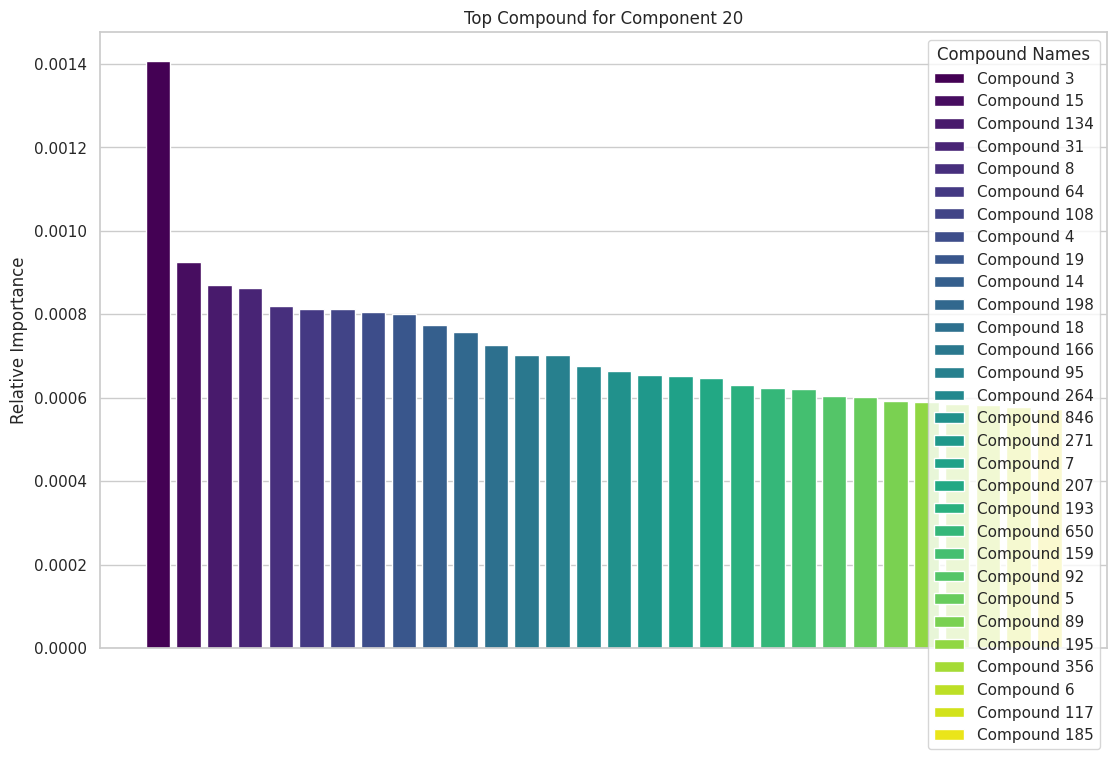

In [ ]:

n_top_compounds = 30  # Number of top compounds to display

# Get the top genes for the 20th component
top_genes_20th_component = compound_feature_importance_report.iloc[20].nlargest(n_top_compounds)

# Plot the top genes for the 150th component
fig, ax = plt.subplots(figsize=(13, 8))

# Plot each bar with a unique color
for idx, (compound, importance) in enumerate(top_genes_20th_component.items()):
    ax.bar(idx, importance, label=compound, color=plt.cm.viridis(idx / len(top_genes_20th_component)))

# Remove x-axis ticks
ax.set_xticks([])

# Display legend with compound names
ax.legend(loc='upper right', title='Compound Names')

ax.set(ylabel='Relative Importance', title='Top Compound for Component 20')
plt.show()


In [ ]:

sample_groups = orignal_data.iloc[0,1:]
group_1 = sample_groups[sample_groups == 1].index.values
group_2 = sample_groups[sample_groups == 2].index.values


print("Group 1:", group_1)
print("Group 2:", group_2)

Group 1: ['S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'S7' 'S8']
Group 2: ['S9' 'S10' 'S11' 'S12' 'S13' 'S14' 'S15' 'S16' 'S17' 'S18' 'S19' 'S20'
 'S21' 'S22' 'S23' 'S24' 'S25' 'S26' 'S27' 'S28']


In [ ]:
scaled_data

S1        S2        S3        S4        S5        S6        S7  \
1     1.135529  0.812427 -0.432729  0.925764  1.536633  1.394483  0.968795   
2    -0.004022  0.216021 -0.241949 -1.966190 -0.635059  0.053849  0.168357   
3    -0.420722 -0.303773 -0.354959 -0.164704 -0.353554 -0.622483 -0.398406   
4    -0.323304 -0.507035 -0.323254 -0.049172 -0.071382 -0.101056  0.947606   
5     0.182370 -0.049697 -0.293593 -1.018744 -0.383725 -0.166141  0.206826   
...        ...       ...       ...       ...       ...       ...       ...   
5201 -1.892678 -2.061357 -2.092800 -1.499502 -1.463703 -1.855417 -1.833798   
5202 -1.837528 -1.857917 -1.744996 -1.612703 -1.461738 -1.580735 -1.940303   
5203 -1.900699 -2.253079 -2.062972 -2.319447 -1.691971 -1.858302 -1.937830   
5204 -2.127055 -2.507603 -2.189369 -2.417938 -2.420981 -2.191849 -2.429949   
5205 -3.452014 -2.923461 -3.200032 -3.625503 -2.882946 -3.534540 -2.813693   

            S8        S9       S10  ...       S20       S21       S22  \
1     0.726025  0.887628  1.135771  ...  1.106226  0.799211  0.877255   
2    -0.500576  0.034475  0.081309  ... -0.219909 -0.318159  0.169012   
3    -0.474390 -0.354314 -0.254876  ... -0.349871 -0.436925 -0.564692   
4    -0.168036 -0.743302 -0.088209  ... -0.175816 -0.265911 -0.184755   
5    -0.661881  0.060392  0.066445  ... -0.006667 -0.072935 -0.176906   
...        ...       ...       ...  ...       ...       ...       ...   
5201 -1.567616 -1.896187 -1.650021  ... -1.790812 -2.056909 -1.824860   
5202 -1.815584 -1.769324 -1.763194  ... -1.448791 -1.502132 -1.588606   
5203 -1.802352 -1.763025 -1.991589  ... -1.966477 -2.115125 -1.809058   
5204 -2.457010 -2.278880 -2.517977  ... -2.227353 -2.155209 -2.271148   
5205 -2.840837 -3.426206 -3.433085  ... -3.365698 -3.993034 -3.051077   

           S23       S24       S25       S26       S27       S28  \
1     1.100089  0.874666  1.674189  1.052712  1.102056  0.931267   
2    -0.554326 -0.284685 -0.661868 -0.403648 -0.602111 -0.509223   
3    -0.485335 -0.600707 -0.306472 -0.188585 -0.348749 -0.183174   
4    -0.025055 -0.550506 -0.120483 -0.480848 -0.258298 -0.023388   
5    -0.109164  0.328212  0.000888 -0.098101  0.148781 -0.048102   
...        ...       ...       ...       ...       ...       ...   
5201 -1.528956 -1.627951 -2.227171 -1.613560 -1.953449 -1.860898   
5202 -1.581592 -1.455259 -1.610636 -1.655878 -1.683688 -1.548400   
5203 -2.067481 -2.002187 -1.809430 -1.875286 -2.138448 -1.971309   
5204 -2.334757 -2.316445 -2.473577 -2.067098 -2.661096 -2.574340   
5205 -3.308086 -3.359149 -2.877768 -3.342389 -2.969092 -3.203018   

             Sample  
1      Compound 468  
2     Compound 3382  
3     Compound 4793  
4     Compound 2186  
5     Compound 4227  
...             ...  
5201  Compound 5919  
5202  Compound 5930  
5203  Compound 5964  
5204  Compound 5978  
5205  Compound 5980  

[5205 rows x 29 columns]

In [ ]:
def get_compound_stats_for_all_compounds(group_1, group_2, expression_data):
    compound_stats_list = []

    for compound_name in expression_data['Sample']:
        # Find the index of the compound
        compound_index = expression_data[expression_data['Sample'] == compound_name].index[0]

        # Extract expression values for the compound and groups
        compound_values_group_1 = expression_data.loc[compound_index, group_1].values.astype(float)
        compound_values_group_2 = expression_data.loc[compound_index, group_2].values.astype(float)

        # Perform t-test
        t_stat, p_value = ttest_ind(compound_values_group_1, compound_values_group_2)

        # Create a data frame with compound expression values
        compound_data = {
            'CompoundName': compound_name,
            'SampleID': [compound_name] * (len(group_1) + len(group_2)),
            'Expression': list(compound_values_group_1) + list(compound_values_group_2)
        }

        compound_df = pd.DataFrame(compound_data)

        # Append compound stats to the list
        compound_stats_list.append({'CompoundName': compound_name, 'TStatistic': t_stat, 'PValue': p_value})

    # Create a data frame with compound statistics
    compound_stats_df = pd.DataFrame(compound_stats_list)

    return compound_stats_df


compound_stats_df = get_compound_stats_for_all_compounds(group_1, group_2, scaled_data)

print('Compound Statistics Dataframe:')
print(compound_stats_df.head())


Compound Statistics Dataframe:
    CompoundName  TStatistic    PValue
0   Compound 468   -1.097768  0.282369
1  Compound 3382   -0.948824  0.351447
2  Compound 4793    1.043754  0.306207
3  Compound 2186    1.215514  0.235092
4  Compound 4227   -1.700503  0.100970


In [ ]:
# Calculate mean expression for each group
mean_expression_group1 = scaled_data[group_1].mean(axis=1)
mean_expression_group2 = scaled_data[group_2].mean(axis=1)

# Calculate fold change
fold_change = mean_expression_group2 / mean_expression_group1

# Add fold change to the DataFrame
scaled_data['FoldChange'] = fold_change
scaled_data['PValue'] = compound_stats_df['PValue']
scaled_data['TStatistic'] = compound_stats_df['TStatistic']

# Display the DataFrame with fold change
print(scaled_data[['Sample', 'FoldChange','PValue','TStatistic']])

             Sample  FoldChange    PValue  TStatistic
1      Compound 468    1.188446  0.351447   -0.948824
2     Compound 3382    0.524792  0.306207    1.043754
3     Compound 4793    1.283101  0.235092    1.215514
4     Compound 2186    4.363869  0.100970   -1.700503
5     Compound 4227    0.306456  0.941640   -0.073920
...             ...         ...       ...         ...
5201  Compound 5919    0.994790  0.270765   -1.125246
5202  Compound 5930    0.955786  0.808111    0.245351
5203  Compound 5964    1.008372  0.984392   -0.019752
5204  Compound 5978    0.999416  0.392819    0.868961
5205  Compound 5980    1.037282       NaN         NaN

[5205 rows x 4 columns]


In [ ]:
orignal_data.isna().sum().sum()

0

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


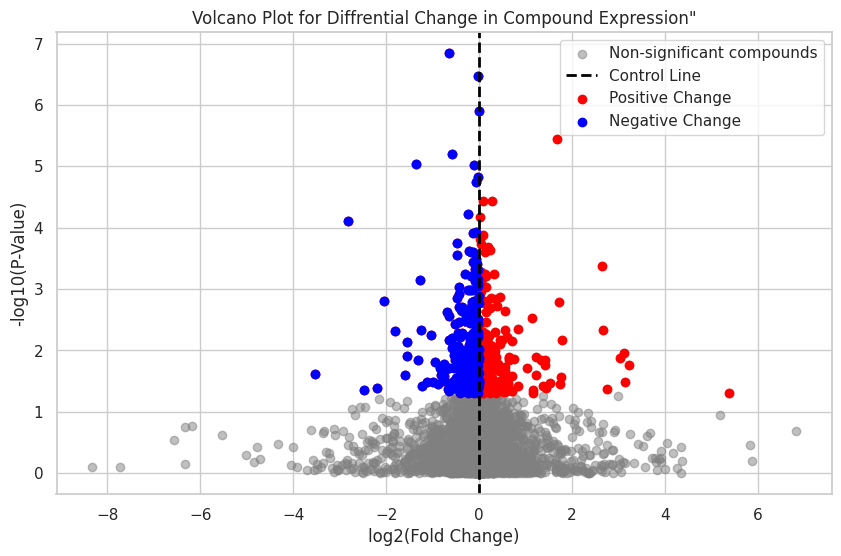

In [ ]:
# Create a volcano plot
plt.figure(figsize=(10, 6))

# Scatter plot with log2(FoldChange)
plt.scatter(np.log2(scaled_data['FoldChange']), -np.log10(scaled_data['PValue']), color='grey', alpha=0.5)

# Highlight significant genes (optional)
significance_threshold = -np.log10(0.05)
significant_genes = scaled_data[scaled_data['PValue'] < 0.05]
plt.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Control Line')
plt.scatter(np.log2(significant_genes['FoldChange']), -np.log10(significant_genes['PValue']), color='red', label='Positive Fold Change')

# Scatter plot for negative fold change
plt.scatter(np.log2(significant_genes[significant_genes['FoldChange'] < 1]['FoldChange']),
            -np.log10(significant_genes[significant_genes['FoldChange'] < 1]['PValue']),
            color='blue', label='Negative Fold Change')

# Set plot labels and title
plt.title('Volcano Plot for Diffrential Change in Compound Expression"')
plt.xlabel('log2(Fold Change)')
plt.ylabel('-log10(P-Value)')

# Add a legend with customized labels
plt.legend(labels={'Non-significant compounds' : 'Non significant compounds', 'Control Line': 'Control Line','Positive Change': 'Positive','Negative Change': 'Negative'})

# Show the plot
plt.show()
